
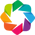

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
import cartopy.crs as ccrs
from shapely.geometry import Point, MultiPolygon, geo, linestring, MultiPoint, MultiLineString
import geopandas as gpd
from bokeh.tile_providers import CARTODBPOSITRON_RETINA
from sklearn.neighbors import DistanceMetric

hv.notebook_extension('bokeh', 'matplotlib')
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [7]:
data1 = './datasets/Kindergarten_Immunization_Data__2016-17.csv'

data2= './datasets/CFR_Vaccine_Map.xlsx'

data3 = './datasets/Added Source information for vaccine map - Sheet1.csv'

In [8]:
df_Vaccine_Preven_Map = pd.read_excel(data2)
df_Vaccine_Preven_Map.head(10)
df_Vaccine_Preven_Map.loc[df_Vaccine_Preven_Map['Impact Scale']=='Secondary', :]
#df_Vaccine_Preven_Map.iloc[1187,-1]


Category        Outbreak                         Location  \
36           Measles         Measles           Australia (Queensland)   
37           Measles         Measles    Australia (Western Australia)   
41           Measles         Measles             Australia (Brisbane)   
46           Measles         Measles      Australia (South Australia)   
48           Measles         Measles             Australia (Victoria)   
50             Other      Diphtheria             Australia (Brisbane)   
51           Measles         Measles             Australia (Adelaide)   
80           Measles         Measles             Australia (Adelaide)   
83           Measles         Measles      Australia (New South Wales)   
92           Measles         Measles      Australia (South Australia)   
94           Measles         Measles      Australia (South Australia)   
96           Measles         Measles                Australia (Perth)   
102          Measles         Measles            Australia (Melbourne)   
110          Measles         Measles    Australia (Western Australia)   
114          Measles         Measles                 Austria (Styria)   
117            Other      Diphtheria                          Austria   
170          Measles         Measles                 Canada (Alberta)   
171          Measles         Measles        Canada (British Columbia)   
175            Mumps           Mumps                 Canada (Ontario)   
176          Measles         Measles                  Canada (Ottawa)   
178          Measles         Measles                  Canada (Quebec)   
193          Measles         Measles                  Canada (Halton)   
194          Measles         Measles                  Canada (Halton)   
197          Measles         Measles    Canada (Prince Edward Island)   
216          Measles         Measles        Canada (British Columbia)   
247          Measles         Measles                 Canada (Toronto)   
249          Measles         Measles           Canada (New Brunswick)   
280            Other    Yellow Fever                            China   
300            Polio           Polio                         DR Congo   
312            Other    Yellow Fever                        DR Congo    
314            Other      Diphtheria               Dominican Republic   
342          Measles         Measles                          Finland   
355          Measles         Measles                          Germany   
393            Polio           Polio             India                  
457          Measles         Measles                Ireland (Belfast)   
487          Measles         Measles                            Japan   
488          Measles         Measles                            Japan   
506            Other    Yellow Fever                            Kenya   
508          Measles         Measles           Kenya (Garissa County)   
546            Polio           Polio                             Mali   
550          Measles         Measles          Mexico (via Disneyland)   
575   Whooping Cough  Whooping Cough         New Zealand (Canterbury)   
578          Measles         Measles        New Zealand (Hawke's Bay)   
581          Measles         Measles              New Zealand (Otago)   
590          Measles         Measles           New Zealand (Kaikoura)   
595          Measles         Measles           New Zealand (Auckland)   
596          Measles         Measles            New Zealand (Aukland)   
617            Polio           Polio                          Nigeria   
902          Measles         Measles                           Panama   
937          Measles       Measles\n           Russia (Krasnoyarsk)\n   
939            Polio           Polio                           Russia   
958          Measles         Measles                 Russia (Izhevsk)   
995          Measles         Measles                         Slovakia   
996          Measles         Measles                         Slovenia 

In [9]:
df_Vaccine_Preven_Map.describe()

Lat          Cases   Fatalities
count  1587.000000    1587.000000  1587.000000
mean     25.209371    1136.880907     7.849401
std      24.843414    7112.530325    78.277133
min     -45.802010       0.000000     0.000000
25%      10.961851       1.000000     0.000000
50%      33.312810      10.000000     0.000000
75%      42.651792      98.000000     0.000000
max      70.299771  134042.000000  2023.000000

In [10]:
df_Vaccine_Preven_Map.shape

(1587, 13)

In [11]:
df_Vaccine_Preven_Map.corr()

Lat     Cases  Fatalities
Lat         1.000000 -0.055026   -0.076850
Cases      -0.055026  1.000000    0.388541
Fatalities -0.076850  0.388541    1.000000

In [12]:
df_Vaccine_Preven_Map.iloc[121,3] = 'Europe'

In [13]:
df_Vaccine_Preven_Map['Continent'].value_counts()

North America    449
Asia             426
Africa           274
Europe           272
Australia        120
South America     33
Asia              10
Australia          1
Africa             1
Oceania            1
Name: Continent, dtype: int64

In [14]:
df_Vaccine_Preven_Map.columns

Index([u'Category', u'Outbreak', u'Location', u'Continent', u'Lat', u'Long',
       u'Date', u'Year', u'Cases', u'Fatalities', u'Impact Scale',
       u'Source Citation', u'Source'],
      dtype='object')

In [15]:
df_Vaccine_Preven_Map.isnull().sum()

Category            0
Outbreak            0
Location            0
Continent           0
Lat                 0
Long                0
Date                0
Year                0
Cases               0
Fatalities          0
Impact Scale       82
Source Citation     0
Source              3
dtype: int64

In [16]:
df_Vaccine_Preven_Map.groupby('Outbreak').count()

Category  Location  Continent  Lat  Long  Date  \
Outbreak                                                                   
Annoucement                      1         1          1    1     1     1   
Announcement                   225       225        225  225   225   225   
Announcement                     3         3          3    3     3     3   
Cerebrospinal Meningitis         2         2          2    2     2     2   
Chicken Pox                     11        11         11   11    11    11   
Cholera                          1         1          1    1     1     1   
Diphtheria                      31        31         31   31    31    31   
Diptheria                        1         1          1    1     1     1   
Diptherina                       1         1          1    1     1     1   
Ebola                            2         2          2    2     2     2   
H1N1 Flu                         1         1          1    1     1     1   
H5N1 Bird flu                    1         1          1    1     1     1   
H7N9 Avian Flu                   1         1          1    1     1     1   
Hepatitis A                      1         1          1    1     1     1   
MERS                             1         1          1    1     1     1   
Measles                        726       726        726  726   726   726   
Measles\n                        9         9          9    9     9     9   
Measles                          2         2          2    2     2     2   
Measles                          1         1          1    1     1     1   
Meningitis                       9         9          9    9     9     9   
Mumps                          109       109        109  109   109   109   
Mumps\n                          5         5          5    5     5     5   
Polio                           71        71         71   71    71    71   
Polio\n                          1         1          1    1     1     1   
Polio (cVDPV2)                   3         3          3    3     3     3   
Polio                            1         1          1    1     1     1   
Rotavirus                        1         1          1    1     1     1   
Rubella                         25        25         25   25    25    25   
Streptococcus suis               1         1          1    1     1     1   
Tetanus                          7         7          7    7     7     7   
Typhoid                         11        11         11   11    11    11   
Typhoid Fever                    9         9          9    9     9     9   
Typhoid Fever\n                  1         1          1    1     1     1   
Violence                        96        96         96   96    96    96   
Whooping Cough                 206       206        206  206   206   206   
Whooping Cough\n                 1         1          1    1     1     1   
Whooping cough                   2         2          2    2     2     2   
Yellow Fever                     7         7          7    7     7     7   

                          Year  Cases  Fatalities  Impact Scale  \
Outbreak                                                          
Annoucement                  1      1           1             1   
Announcement               225    225         225           225   
Announcement                 3      3           3             3   
Cerebrospinal Meningitis     2      2           2             2   
Chicken Pox                 11     11          11            11   
Cholera                      1      1           1             1   
Diphtheria                  31     31          31            31   
Diptheria                    1      1           1             1   
Diptherina                   1      1           1             1   
Ebola                        2      2           2             2   
H1N1 Flu                     1      1           1             1   
H5N1 Bird flu                1      1           1             1   
H7N9 Avian Flu               1      1          

In [17]:
df_Vaccine_Preven_Map.groupby('Category').describe()

Cases                                                      \
                count         mean           std  min   25%   50%     75%   
Category                                                                    
Attacks         318.0     1.094340      3.230947  0.0  0.00   0.0    1.00   
Attacks           3.0     0.000000      0.000000  0.0  0.00   0.0    0.00   
Measles         740.0  2007.966216  10102.843146  0.0  3.00  21.5  276.25   
Mumps           114.0   373.438596   1695.336529  1.0  6.25  20.5  104.00   
Other           102.0   594.049020   1989.985872  0.0  2.00  15.0  206.25   
Polio            76.0    35.486842     73.640477  1.0  3.00   6.5   26.00   
Rubella          25.0  3319.440000   9089.069406  1.0  6.00  18.0  100.00   
Whooping Cough  209.0   617.889952   1908.184682  1.0  9.00  44.0  247.00   

                         Fatalities                                        \
                     max      count       mean         std  min  25%  50%   
Category                                                                    
Attacks             34.0      318.0   0.610063    2.009165  0.0  0.0  0.0   
Attacks              0.0        3.0   0.000000    0.000000  0.0  0.0  0.0   
Measles         134042.0      740.0  10.663514   97.878506  0.0  0.0  0.0   
Mumps            16352.0      114.0   0.000000    0.000000  0.0  0.0  0.0   
Other            14473.0      102.0  39.882353  156.538060  0.0  0.0  0.0   
Polio              430.0       76.0   1.381579    9.961214  0.0  0.0  0.0   
Rubella          39122.0       25.0   2.000000    9.591663  0.0  0.0  0.0   
Whooping Cough   13167.0      209.0   0.712919    3.932590  0.0  0.0  0.0   

                               Lat                                   \
                75%     max  count       mean        std        min   
Category                                                              
Attacks         0.0    16.0  318.0  26.432885  13.026998 -30.000232   
Attacks         0.0     0.0    3.0  20.021649  12.118694  12.971599   
Measles         0.0  2023.0  740.0  23.102263  28.286069 -45.802010   
Mumps           0.0     0.0  114.0  37.883842  19.976881 -36.848460   
Other           5.0  1155.0  102.0  18.269769  24.622352 -36.848460   
Polio           0.0    85.0   76.0  16.810264  16.056026 -20.937637   
Rubella         0.0    48.0   25.0  27.817801  28.323743 -39.848460   
Whooping Cough  0.0    50.0  209.0  30.098448  26.943312 -45.282800   

                                                            
                      25%        50%        75%        max  
Category                                                    
Attacks         24.861460  30.382361  34.014970  52.130700  
Attacks         13.024985  13.078372  23.546674  34.014975  
Measles          6.515187  33.717810  45.062508  68.993070  
Mumps           35.868225  42.250743  50.691781  61.218056  
Other            2.698421  18.853440  38.640227  60.128160  
Polio            6.797378  16.863376  30.992334  61.524010  
Rubella         22.820300  37.996160  49.839683  60.413850  
Whooping Cough  33.240560  39.891210  44.383580  70.299771

In [18]:
df_Vaccine_Preven_Map.groupby('Outbreak').corr()

Cases  Fatalities       Lat
Outbreak                                                           
Annoucement              Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
Announcement             Cases       1.000000    0.705772 -0.084660
                         Fatalities  0.705772    1.000000 -0.126217
                         Lat        -0.084660   -0.126217  1.000000
Announcement             Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN  1.000000
Cerebrospinal Meningitis Cases       1.000000    1.000000 -1.000000
                         Fatalities  1.000000    1.000000 -1.000000
                         Lat        -1.000000   -1.000000  1.000000
Chicken Pox              Cases       1.000000   -0.119419  0.186865
                         Fatalities -0.119419    1.000000 -0.335204
                         Lat         0.186865   -0.335204  1.000000
Cholera                  Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
Diphtheria               Cases       1.000000    0.533969 -0.103549
                         Fatalities  0.533969    1.000000 -0.163541
                         Lat        -0.103549   -0.163541  1.000000
Diptheria                Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
Diptherina               Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
Ebola                    Cases       1.000000   -1.000000  1.000000
                         Fatalities -1.000000    1.000000 -1.000000
                         Lat         1.000000   -1.000000  1.000000
H1N1 Flu                 Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
H5N1 Bird flu            Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
H7N9 Avian Flu           Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
Hepatitis A              Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
MERS                     Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
Measles                  Cases       1.000000    0.430819 -0.061830
                         Fatalities  0.430819    1.000000 -0.071946
                         Lat        -0.061830   -0.071946  1.000000
Measles\n                Cases       1.000000   -0.171149  0.018777
                         Fatalities -0.171149    1.000000 -0.219912
                         Lat         0.018777   -0.219912  1.000000
Measles                  Cases       1.000000         NaN  1.000000
                         Fatalities       NaN         NaN       NaN
                         Lat         1.000000         NaN  1.000000
Measles                  Cases            NaN         NaN       NaN
                         Fatalities       NaN         NaN       NaN
                         Lat              NaN         NaN       NaN
Meningitis               Cas

In [19]:
df_Vaccine_Preven_Map['Outbreak'].value_counts()
#two attacks Measles, Whooping Cough

Measles                     726
Announcement                225
Whooping Cough              206
Mumps                       109
Violence                     96
Polio                        71
Diphtheria                   31
Rubella                      25
Chicken Pox                  11
Typhoid                      11
Measles\n                     9
Typhoid Fever                 9
Meningitis                    9
Yellow Fever                  7
Tetanus                       7
Mumps\n                       5
Polio (cVDPV2)                3
Announcement                  3
Cerebrospinal Meningitis      2
Whooping cough                2
Ebola                         2
Measles                       2
H5N1 Bird flu                 1
Polio\n                       1
Cholera                       1
Streptococcus suis            1
MERS                          1
Annoucement                   1
Hepatitis A                   1
Polio                         1
Diptherina                    1
Measles 

In [20]:
# some of the attacks are just hits on headlines
df_Vaccine_Preven_Map.iloc[9,:]

Category                                                     Attacks
Outbreak                                                    Violence
Location                                                 Afghanistan
Continent                                                       Asia
Lat                                                           33.934
Long                                                      67.7034312
Date                                                          3/2014
Year                                                            2014
Cases                                                              3
Fatalities                                                         3
Impact Scale                                                     NaN
Source Citation    IANS Live. "Roadside bomb kills 3 polio vaccin...
Source             http://www.ianslive.in/index.php?param=news/Ro...
Name: 9, dtype: object

In [21]:
df_Vaccine_Preven_Map.iloc[1532,1] = 'Announcement'

In [22]:
df_Vaccine_Preven_Map.iloc[1532,:]

Category                                                     Measles
Outbreak                                                Announcement
Location                                U.S. (Boston, Massachusetts)
Continent                                              North America
Lat                                                          42.3632
Long                                                      -71.068830
Date                                             2017-06-01 00:00:00
Year                                                            2017
Cases                                                              0
Fatalities                                                         0
Impact Scale                                            Announcement
Source Citation    Fearnow, Benjamin. "Study: 52 Percent of US Tr...
Source             https://www.studyfinds.org/measles-vaccination...
Name: 1532, dtype: object

In [23]:
df_Vaccine_Preven_Map.loc[df_Vaccine_Preven_Map['Cases'],:].isnull().sum()

Category           131
Outbreak           131
Location           131
Continent          131
Lat                131
Long               131
Date               131
Year               131
Cases              131
Fatalities         131
Impact Scale       191
Source Citation    131
Source             131
dtype: int64

In [24]:
df_Vaccine_Preven_Map.groupby('Location').dtypes

Cases Category Continent  \
Location                                                                       
(U.S.) New York                                     int64   object    object   
Afghanistan                                         int64   object    object   
Afghanistan (Badakhshan)                            int64   object    object   
Afghanistan (Jalalabad)                             int64   object    object   
Afghanistan (Kandahar)                              int64   object    object   
Afghanistan (Kunar Province)                        int64   object    object   
Algeria (Adrar)                                     int64   object    object   
Angola                                              int64   object    object   
Angola (Cunene)                                     int64   object    object   
Angola (Huila)                                      int64   object    object   
Angola (Kuando Kubango)                             int64   object    object   
Angola (Kwanza North)                               int64   object    object   
Angola (Uige)                                       int64   object    object   
Argentina                                           int64   object    object   
Australia                                           int64   object    object   
Australia (Adelaide)                                int64   object    object   
Australia (Australian Capital Territory)            int64   object    object   
Australia (Ballarat)                                int64   object    object   
Australia (Blacktown)                               int64   object    object   
Australia (Brisbane)                                int64   object    object   
Australia (Broome)                                  int64   object    object   
Australia (Cairns, Queensland)                      int64   object    object   
Australia (Campbelltown)                            int64   object    object   
Australia (Canberra)                                int64   object    object   
Australia (Darwin)                                  int64   object    object   
Australia (Gladstone Region)                        int64   object    object   
Australia (Melbourne)                               int64   object    object   
Australia (Nambour, Queensland)                     int64   object    object   
Australia (New South Wales)                         int64   object    object   
Australia (North West Queensland and Gulf)          int64   object    object   
Australia (Northern Territory)                      int64   object    object   
Australia (Perth)                                   int64   object    object   
Australia (Queensland)                              int64   object    object   
Australia (South Australia)                         int64   object    object   
Australia (Swansea)                                 int64   object    object   
Australia (Sydney)                                  int64   object    object   
Australia (Tasmania)                                int64   object    object   
Australia (Victoria)                                int64   object    object   
Australia (Victoria)                                int64   object    object   
Australia (Western Australia)                       int64   object    object   
Austria                                             int64   object    object   
Austria (Styria)                                    int64   object    object   
Bahrain                                             int64   object    object   
Bangladesh (Bandarban)                              int64   object    object   
Belarus                                             int64   object    object   
Belgium                                             int64   object    object   
Belgium (Wallonia)                                  int64   object    object   
Benin                                               int64   object    object   
Bhutan                                              

In [25]:
df_Vaccine_Preven_Map[['Lat']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 1 columns):
Lat    1587 non-null float64
dtypes: float64(1)
memory usage: 12.5 KB


In [26]:
df_Vaccine_Preven_Map.describe()

Lat          Cases   Fatalities
count  1587.000000    1587.000000  1587.000000
mean     25.209371    1136.880907     7.849401
std      24.843414    7112.530325    78.277133
min     -45.802010       0.000000     0.000000
25%      10.961851       1.000000     0.000000
50%      33.312810      10.000000     0.000000
75%      42.651792      98.000000     0.000000
max      70.299771  134042.000000  2023.000000

In [27]:
df_Vaccine_Preven_Map.dtypes
df_Vaccine_Preven_Map.columns

Index([u'Category', u'Outbreak', u'Location', u'Continent', u'Lat', u'Long',
       u'Date', u'Year', u'Cases', u'Fatalities', u'Impact Scale',
       u'Source Citation', u'Source'],
      dtype='object')

In [28]:
#test df_Vaccine_Preven_Map.loc[(df_Vaccine_Preven_Map['Continent']=='North America') & (df_Vaccine_Preven_Map['Continent']=='Europe'),:]

In [29]:
df_Na_va = df_Vaccine_Preven_Map.loc[(df_Vaccine_Preven_Map['Continent']=='North America'),:]
df_Na_va.reset_index(inplace=True)
df_Na_va.drop(['Source Citation', 'Source', 'index', 'Category'], inplace =  True, axis =1)
df_Na_va.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Outbreak                   Location      Continent        Lat         Long  \
0    Mumps            Canada (Quebec)  North America  51.939964   -73.549136   
1  Measles           Canada (Alberta)  North America  53.933271  -116.576504   
2  Measles  Canada (British Columbia)  North America  53.726668  -127.647621   
3  Measles            Canada (Ottawa)  North America  47.411572   -75.698194   
4  Measles           Canada (Alberta)  North America  55.933270    -117.5765   

      Date  Year  Cases  Fatalities Impact Scale  
0   6/2009  2009     15           0      Cluster  
1   5/2010  2010      4           0    Secondary  
2   3/2010  2010     78           0    Secondary  
3  12/2010  2010      1           0     Isolated  
4  08/2011  2011      1           0     Isolated

In [30]:
df_Na_va.describe()

Lat         Cases  Fatalities
count  449.000000    449.000000  449.000000
mean    40.859606    208.930958    0.146993
std      7.620892   1010.754601    1.195507
min      8.537981      0.000000    0.000000
25%     37.090240      1.000000    0.000000
50%     40.678178      6.000000    0.000000
75%     44.681987     32.000000    0.000000
max     70.299771  12000.000000   16.000000

In [31]:
df_Na_va.corr()

Lat     Cases  Fatalities
Lat         1.000000 -0.066184   -0.230253
Cases      -0.066184  1.000000    0.088031
Fatalities -0.230253  0.088031    1.000000

In [32]:
#get dummies for the types of out breaks and impact scale as well source citation, location

In [33]:
df_Na_va.groupby('Outbreak').describe()

Cases                                                     \
                count         mean          std     min      25%     50%   
Outbreak                                                                   
Announcement     24.0     0.000000     0.000000     0.0     0.00     0.0   
Chicken Pox       5.0    30.000000    42.455859     2.0     3.00     4.0   
Diphtheria        4.0    28.750000    31.805398     2.0     6.50    20.5   
H1N1 Flu          1.0     1.000000          NaN     1.0     1.00     1.0   
Hepatitis A       1.0   107.000000          NaN   107.0   107.00   107.0   
Measles         180.0    19.133333    83.025634     1.0     1.00     2.0   
Measles           1.0     1.000000          NaN     1.0     1.00     1.0   
Meningitis        1.0     5.000000          NaN     5.0     5.00     5.0   
Mumps            66.0   223.924242   846.928556     1.0     5.00    11.5   
Mumps\n           1.0    57.000000          NaN    57.0    57.00    57.0   
Rotavirus         1.0  4336.000000          NaN  4336.0  4336.00  4336.0   
Tetanus           3.0     1.666667     1.154701     1.0     1.00     1.0   
Typhoid           1.0     1.000000          NaN     1.0     1.00     1.0   
Whooping Cough  158.0   379.462025  1304.474048     1.0     6.25    27.5   
Whooping cough    2.0  5427.000000  7642.410091    23.0  2725.00  5427.0   

                                 Fatalities                                  \
                    75%      max      count       mean       std  min   25%   
Outbreak                                                                      
Announcement       0.00      0.0       24.0   0.000000  0.000000  0.0  0.00   
Chicken Pox       41.00    100.0        5.0   0.000000  0.000000  0.0  0.00   
Diphtheria        42.75     72.0        4.0  10.000000  6.976150  1.0  6.25   
H1N1 Flu           1.00      1.0        1.0   1.000000       NaN  1.0  1.00   
Hepatitis A      107.00    107.0        1.0   0.000000       NaN  0.0  0.00   
Measles            6.00    776.0      180.0   0.005556  0.074536  0.0  0.00   
Measles            1.00      1.0        1.0   0.000000       NaN  0.0  0.00   
Meningitis         5.00      5.0        1.0   2.000000       NaN  2.0  2.00   
Mumps             54.75   5311.0       66.0   0.000000  0.000000  0.0  0.00   
Mumps\n           57.00     57.0        1.0   0.000000       NaN  0.0  0.00   
Rotavirus       4336.00   4336.0        1.0   0.000000       NaN  0.0  0.00   
Tetanus            2.00      3.0        3.0   0.000000  0.000000  0.0  0.00   
Typhoid            1.00      1.0        1.0   0.000000       NaN  0.0  0.00   
Whooping Cough   118.25  12000.0      158.0   0.120253  0.760134  0.0  0.00   
Whooping cough  8129.00  10831.0        2.0   1.500000  0.707107  1.0  1.25   

                                     Lat                                  \
                 50%    75%   max  count       mean       std        min   
Outbreak                                                                   
Announcement     0.0   0.00   0.0   24.0  38.756019  5.201024  30.267153   
Chicken Pox      0.0   0.00   0.0    5.0  37.336614  5.841588  27.664827   
Diphtheria      11.5  15.25  16.0    4.0  18.818115  0.185929  18.594390   
H1N1 Flu         1.0   1.00   1.0    1.0  38.907192       NaN  38.907192   
Hepatitis A      0.0   0.00   0.0    1.0  44.314844       NaN  44.314844   
Measles          0.0   0.00   1.0  180.0  41.411169  7.738460   8.537981   
Measles          0.0   0.00   0.0    1.0  39.550051       NaN  39.550051   
Meningitis       2.0   2.00   2.0    1.0  39.550051       NaN  39.550051   
Mumps            0.0   0.00   0.0   66.0  40.031076  7.215442  13.444304   
Mumps\n          0.0   0.00   0.0    1.0  40.714353       NaN  40.714353   
Rotavirus        0.0   0.00   0.0    1.0  15.783471       NaN  15.783471   
Tetanus          0.0   0.00   0.0    3.0  42.241069  3.814133  37.839333   
Typhoid          0.0   0.00   0.0    1.0  37.769220       NaN  37.769220   
Whooping

In [34]:
df_Na_va['Outbreak'].replace('Measles ','Measles', inplace=True)
df_Na_va['Outbreak'].replace('Whooping cough','Whooping Cough', inplace=True)
df_Na_va['Outbreak'].replace("Mumps\n",'Mumps', inplace=True)
df_Na_va['Outbreak'].replace('Announcement','Announcement',inplace=True)


C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
df_Na_va.loc[df_Na_va['Outbreak']=='Measles ','Outbreak']

Series([], Name: Outbreak, dtype: object)

In [36]:
diseases = ['Announcement','Tetanus','Chicken Pox','Measles','Mumps','Rotavirus']

In [37]:
df_Na_va['Outbreak'].head()

0      Mumps
1    Measles
2    Measles
3    Measles
4    Measles
Name: Outbreak, dtype: object

In [38]:
df_dummies_outbreak = pd.get_dummies(df_Na_va['Outbreak'])
df_dummies_outbreak.head()
df_dummies_outbreak.Announcement.mean()
df_dummies_outbreak.drop('Announcement',axis = 1 , inplace=True)
df_dummies_outbreak.describe()



Chicken Pox  Diphtheria    H1N1 Flu  Hepatitis A     Measles  \
count   449.000000  449.000000  449.000000   449.000000  449.000000   
mean      0.011136    0.008909    0.002227     0.002227    0.403118   
std       0.105054    0.094069    0.047193     0.047193    0.491071   
min       0.000000    0.000000    0.000000     0.000000    0.000000   
25%       0.000000    0.000000    0.000000     0.000000    0.000000   
50%       0.000000    0.000000    0.000000     0.000000    0.000000   
75%       0.000000    0.000000    0.000000     0.000000    1.000000   
max       1.000000    1.000000    1.000000     1.000000    1.000000   

       Meningitis       Mumps   Rotavirus     Tetanus     Typhoid  \
count  449.000000  449.000000  449.000000  449.000000  449.000000   
mean     0.002227    0.149220    0.002227    0.006682    0.002227   
std      0.047193    0.356703    0.047193    0.081558    0.047193   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Whooping Cough  
count      449.000000  
mean         0.356347  
std          0.479454  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000

In [39]:
df_dummies_outbreak.columns
df_Na_va.loc[df_world['Impact Scale'].isnull()==True,'Impact Scale']

NameError: name 'df_world' is not defined

In [87]:
df_impact_dummies = pd.get_dummies(df_Na_va['Impact Scale'])
df_impact_dummies.head()
df_impact_dummies.columns
df_impact_dummies.drop('Whooping Cough', inplace=True, axis = 1)
df_impact_dummies.head()
df_impact_dummies.describe()
#What are the cluster, epidemic, isolated, secondary definitions
#epidemic  Epidemic refers to an increase, often sudden, 
#in the number of cases of a disease above what is normally expected in that population in that area
#clusterCluster refers to an aggregation of cases grouped in place and time that are suspected to be greater than the number expected, 
#even though the expected number may not be known.

Announcement     Cluster    Epidemic    Isolated   Secondary
count    449.000000  449.000000  449.000000  449.000000  449.000000
mean       0.053452    0.398664    0.211581    0.233853    0.093541
std        0.225184    0.490169    0.408885    0.423752    0.291514
min        0.000000    0.000000    0.000000    0.000000    0.000000
25%        0.000000    0.000000    0.000000    0.000000    0.000000
50%        0.000000    0.000000    0.000000    0.000000    0.000000
75%        0.000000    1.000000    0.000000    0.000000    0.000000
max        1.000000    1.000000    1.000000    1.000000    1.000000

In [88]:
df_dummies_outbreak.head()

Chicken Pox  Diphtheria  H1N1 Flu  Hepatitis A  Measles  Meningitis  Mumps  \
0            0           0         0            0        0           0      1   
1            0           0         0            0        1           0      0   
2            0           0         0            0        1           0      0   
3            0           0         0            0        1           0      0   
4            0           0         0            0        1           0      0   

   Rotavirus  Tetanus  Typhoid  Whooping Cough  
0          0        0        0               0  
1          0        0        0               0  
2          0        0        0               0  
3          0        0        0               0  
4          0        0        0               0

In [89]:
df_impact_dummies['Announcement'].mean()

0.053452115812917596

In [90]:
df = pd.concat([df_Na_va,df_impact_dummies], axis=1)
df.head()

Outbreak                   Location      Continent        Lat         Long  \
0    Mumps            Canada (Quebec)  North America  51.939964   -73.549136   
1  Measles           Canada (Alberta)  North America  53.933271  -116.576504   
2  Measles  Canada (British Columbia)  North America  53.726668  -127.647621   
3  Measles            Canada (Ottawa)  North America  47.411572   -75.698194   
4  Measles           Canada (Alberta)  North America  55.933270    -117.5765   

      Date  Year  Cases  Fatalities Impact Scale  Announcement  Cluster  \
0   6/2009  2009     15           0      Cluster             0        1   
1   5/2010  2010      4           0    Secondary             0        0   
2   3/2010  2010     78           0    Secondary             0        0   
3  12/2010  2010      1           0     Isolated             0        0   
4  08/2011  2011      1           0     Isolated             0        0   

   Epidemic  Isolated  Secondary  
0         0         0          0  
1         0         0          1  
2         0         0          1  
3         0         1          0  
4         0         1          0

In [91]:
df.describe()

Lat         Cases  Fatalities  Announcement     Cluster  \
count  449.000000    449.000000  449.000000    449.000000  449.000000   
mean    40.859606    208.930958    0.146993      0.053452    0.398664   
std      7.620892   1010.754601    1.195507      0.225184    0.490169   
min      8.537981      0.000000    0.000000      0.000000    0.000000   
25%     37.090240      1.000000    0.000000      0.000000    0.000000   
50%     40.678178      6.000000    0.000000      0.000000    0.000000   
75%     44.681987     32.000000    0.000000      0.000000    1.000000   
max     70.299771  12000.000000   16.000000      1.000000    1.000000   

         Epidemic    Isolated   Secondary  
count  449.000000  449.000000  449.000000  
mean     0.211581    0.233853    0.093541  
std      0.408885    0.423752    0.291514  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000

In [92]:
df['Long'].astype(float)

0      -73.549136
1     -116.576504
2     -127.647621
3      -75.698194
4     -117.576500
5     -113.490450
6      -85.323214
7      -75.698194
8      -73.549136
9      -73.549136
10     -73.549140
11    -106.450864
12    -123.113927
13    -122.959423
14    -113.490450
15    -126.123050
16     -73.553990
17     -66.461920
18     -88.945310
19    -106.435550
20    -135.000010
21    -123.002580
22    -127.647620
23    -114.058100
24     -79.799030
25     -79.799030
26     -65.874020
27     -80.739060
28     -63.416810
29     -75.701270
30    -106.440000
31    -114.091430
32     -79.383180
33    -116.576500
34    -121.815930
35    -114.058100
36    -111.380340
37     -79.866090
38     -98.813880
39    -123.282150
40     -79.784840
41     -79.829670
42     -81.243180
43     -75.697190
44     -64.201990
45    -106.683240
46    -106.450860
47    -122.800000
48    -112.990600
49     -97.181440
50     -98.813876
51     -66.461916
52    -106.670046
53     -81.150690
54     -80.248170
55     -79

In [93]:
for col in df.columns:
    print col



Outbreak
Location
Continent
Lat
Long
Date
Year
Cases
Fatalities
Impact Scale
Announcement
Cluster
Epidemic
Isolated
Secondary


In [94]:
df.corr()

Lat     Cases  Fatalities  Announcement   Cluster  \
Lat           1.000000 -0.066184   -0.230253     -0.065667 -0.075859   
Cases        -0.066184  1.000000    0.088031     -0.049176 -0.152721   
Fatalities   -0.230253  0.088031    1.000000     -0.029251  0.059758   
Announcement -0.065667 -0.049176   -0.029251      1.000000 -0.193489   
Cluster      -0.075859 -0.152721    0.059758     -0.193489  1.000000   
Epidemic      0.077531  0.378284    0.000163     -0.123104 -0.421798   
Isolated      0.032062 -0.113615   -0.037163     -0.131288 -0.449842   
Secondary     0.013438 -0.064469   -0.020327     -0.076338 -0.261560   

              Epidemic  Isolated  Secondary  
Lat           0.077531  0.032062   0.013438  
Cases         0.378284 -0.113615  -0.064469  
Fatalities    0.000163 -0.037163  -0.020327  
Announcement -0.123104 -0.131288  -0.076338  
Cluster      -0.421798 -0.449842  -0.261560  
Epidemic      1.000000 -0.286204  -0.166413  
Isolated     -0.286204  1.000000  -0.177477  
Secondary    -0.166413 -0.177477   1.000000

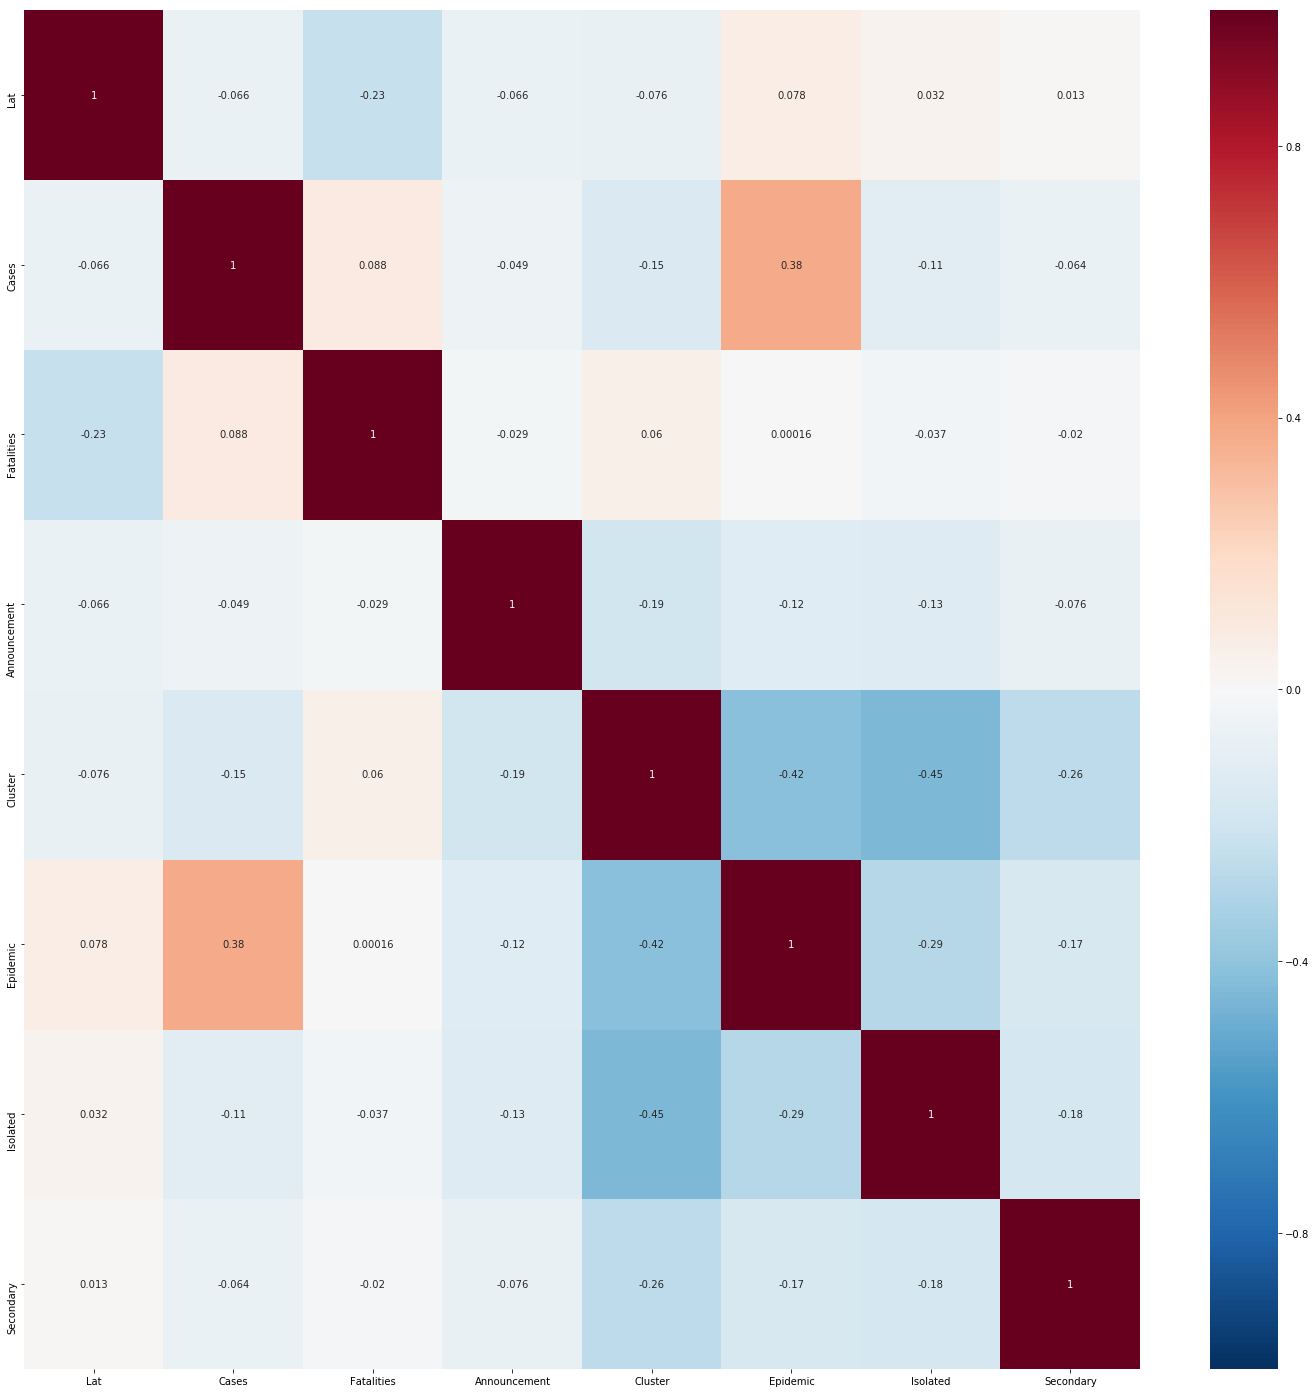

In [95]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot=True)

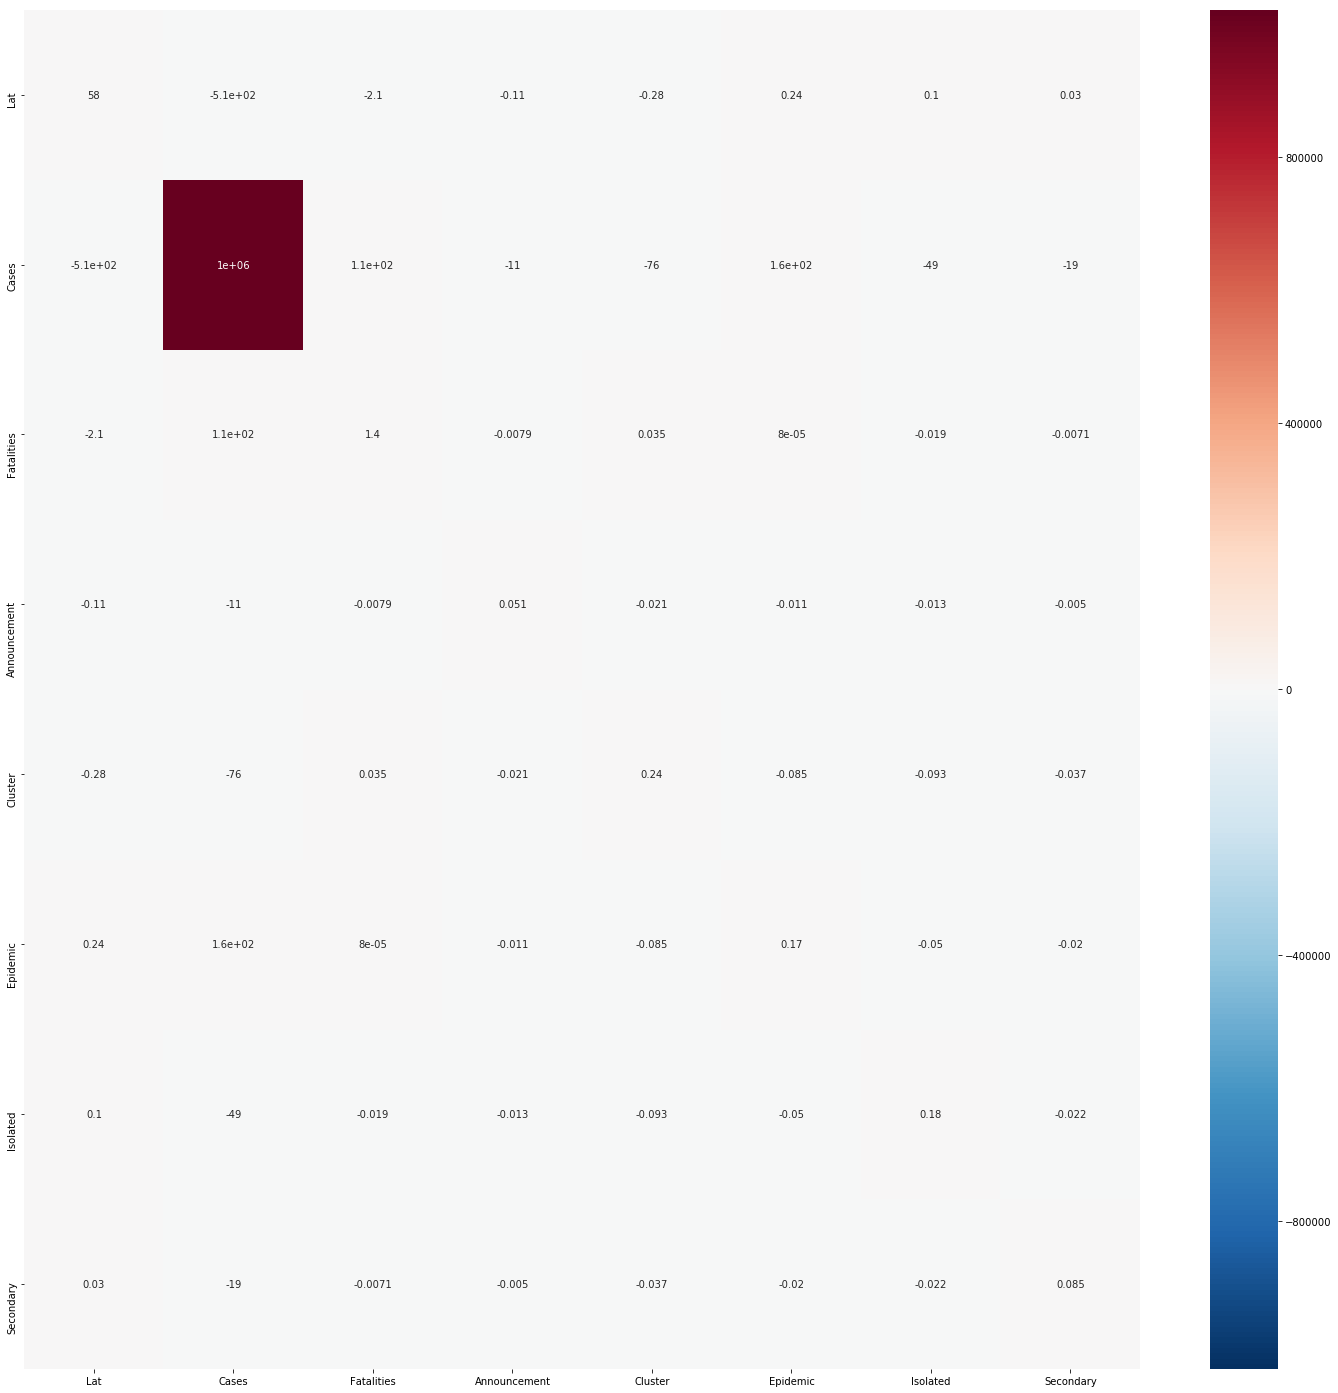

In [96]:
plt.figure(figsize = (25,25))
sns.heatmap(df.cov(), annot=True)

In [97]:
Features = [col for col in df.columns if col is not 'Long' and 'Lat']
Features.remove('Lat')
Features.remove('Long')
Features

[u'Outbreak',
 u'Location',
 u'Continent',
 u'Date',
 u'Year',
 u'Cases',
 u'Fatalities',
 u'Impact Scale',
 u'Announcement',
 u'Cluster',
 u'Epidemic',
 u'Isolated',
 u'Secondary']

In [98]:
diseases_na = ['Cases','Epidemic','Cluster','Announcement','Measles','Whooping Cough','Secondary','Mumps','Fatalities']

In [99]:
#plt.figure(figsize=(20,15))
#sns.heatmap(df[diseases_na].corr(), annot=True)

In [100]:
#north america done now going into europe same procedure as north america but no we are going to merge them together

In [101]:
df_eu = df_Vaccine_Preven_Map.loc[(df_Vaccine_Preven_Map['Continent']=='Europe'),:]
df_eu.reset_index(inplace=True)
df_eu.drop(['Source Citation', 'Source', 'index', 'Category'], inplace =  True, axis =1)
df_eu.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Outbreak          Location Continent        Lat      Long  \
0     Measles  Austria (Styria)    Europe  47.264901  14.89393   
1     Measles           Austria    Europe  47.070120  12.98584   
2     Rubella           Austria    Europe  48.180740  15.46875   
3  Diphtheria           Austria    Europe  48.180740  15.46875   
4     Measles           Austria    Europe  48.180740  15.46875   

              Date  Year  Cases  Fatalities Impact Scale  
0           3/2009  2009     37           0    Secondary  
1  11/2011-10/2012  2012     35           0      Cluster  
2  11/2011-10/2012  2012     10           0     Isolated  
3           1/2017  2017      1           0    Secondary  
4           1/2017  2017     78           0      Cluster

In [102]:
df_eu['Outbreak'].value_counts()

Measles               169
Mumps                  30
Announcement           15
Rubella                12
Diphtheria              8
Whooping Cough          7
Measles\n               7
Polio                   5
Mumps\n                 4
Typhoid                 4
Tetanus                 2
Chicken Pox             2
Meningitis              2
Measles                 1
Streptococcus suis      1
Diptherina              1
Measles                 1
Violence                1
Name: Outbreak, dtype: int64

In [103]:
df_eu.groupby('Outbreak').describe()

Cases                                                      \
                    count         mean           std     min      25%     50%   
Outbreak                                                                        
Announcement         15.0     0.066667      0.258199     0.0     0.00     0.0   
Chicken Pox           2.0  1152.000000   1629.174024     0.0   576.00  1152.0   
Diphtheria            8.0     5.000000      8.960230     1.0     1.00     1.5   
Diptherina            1.0     2.000000           NaN     2.0     2.00     2.0   
Measles             169.0   630.781065   1827.407764     0.0    11.00    45.0   
Measles\n             7.0   189.714286    349.660175     1.0    12.50    34.0   
Measles               1.0   148.000000           NaN   148.0   148.00   148.0   
Measles               1.0  1049.000000           NaN  1049.0  1049.00  1049.0   
Meningitis            2.0     6.000000      5.656854     2.0     4.00     6.0   
Mumps                30.0   185.966667    383.115584     3.0    24.50    70.5   
Mumps\n               4.0  4110.000000   8161.374557    10.0    11.50    39.0   
Polio                 5.0    10.200000      9.984989     1.0     2.00     7.0   
Rubella              12.0  5861.583333  12570.667773    10.0    16.75    54.5   
Streptococcus suis    1.0   930.000000           NaN   930.0   930.00   930.0   
Tetanus               2.0     1.000000      0.000000     1.0     1.00     1.0   
Typhoid               4.0    38.750000     39.626380     6.0     8.25    29.5   
Violence              1.0     4.000000           NaN     4.0     4.00     4.0   
Whooping Cough        7.0  3067.142857   4659.405771     4.0   115.00  1080.0   

                                     Fatalities                           \
                        75%      max      count      mean       std  min   
Outbreak                                                                   
Announcement           0.00      1.0       15.0  0.066667  0.258199  0.0   
Chicken Pox         1728.00   2304.0        2.0  0.000000  0.000000  0.0   
Diphtheria             3.25     27.0        8.0  0.125000  0.353553  0.0   
Diptherina             2.00      2.0        1.0  0.000000       NaN  0.0   
Measles              219.00  14949.0      169.0  0.236686  2.317804  0.0   
Measles\n            155.00    958.0        7.0  0.000000  0.000000  0.0   
Measles              148.00    148.0        1.0  0.000000       NaN  0.0   
Measles             1049.00   1049.0        1.0  0.000000       NaN  0.0   
Meningitis             8.00     10.0        2.0  0.500000  0.707107  0.0   
Mumps                149.50   2000.0       30.0  0.000000  0.000000  0.0   
Mumps\n             4137.50  16352.0        4.0  0.000000  0.000000  0.0   
Polio                 17.00     24.0        5.0  0.000000  0.000000  0.0   
Rubella             2320.50  39122.0       12.0  0.000000  0.000000  0.0   
Streptococcus suis   930.00    930.0        1.0  0.000000       NaN  0.0   
Tetanus                1.00      1.0        2.0  0.000000  0.000000  0.0   
Typhoid               60.00     90.0        4.0  0.000000  0.000000  0.0   
Violence               4.00      4.0        1.0  4.000000       NaN  4.0   
Whooping Cough      3644.00  12868.0        7.0  1.142857  2.035401  0.0   

                                             Lat                        \
                     25%  50%   75%   max  count       mean        std   
Outbreak                                                                 
Announcement        0.00  0.0  0.00   1.0   15.0  45.158220   5.808740   
Chicken Pox         0.00  0.0  0.00   0.0    2.0  53.490080   1.604538   
Diphtheria          0.00  0.0  0.00   1.0    8.0  52.180974   5.757396   
Diptherina          0.00  0.0  0.00   0.0    1.0  53.142367        NaN   
Measles             0.00  0.0  0.00  30.0  169.0  49.459027   8.410470   
Measles\n           0.00  0.0  0.00   0.0    7.0  46.986957   7.976997   
Measles             0.00  0.0  0.00   0.0    1.0  46.36

In [104]:
df_eu['Outbreak'].replace('Measles ','Measles', inplace=True)
df_eu['Outbreak'].replace('Measles ','Measles', inplace=True)
df_eu['Outbreak'].replace("Mumps\n",'Mumps', inplace=True)
df_eu['Outbreak'].replace("Measles\n",'Measles', inplace=True)


In [105]:
df_eu.loc[df_eu['Cases']==1049,'Outbreak'] = 'Measles'
    

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [106]:
df_eu.loc[df_eu['Outbreak']=='Measles',:]

Outbreak                          Location Continent        Lat  \
0    Measles                  Austria (Styria)    Europe  47.264901   
1    Measles                           Austria    Europe  47.070120   
4    Measles                           Austria    Europe  48.180740   
5    Measles                           Belarus    Europe  54.521280   
6    Measles                           Belgium    Europe  50.503887   
7    Measles                           Belgium    Europe  50.545290   
9    Measles                Belgium (Wallonia)    Europe  51.219450   
10   Measles                            Bosnia    Europe  43.739350   
11   Measles                            Bosnia    Europe  43.915890   
12   Measles                        Bulgaria\n    Europe  42.733883   
13   Measles                          Bulgaria    Europe  40.733883   
14   Measles                          Bulgaria    Europe  42.799430   
16   Measles                Bulgaria (Montana)    Europe  43.408516   
17   Measles             Bulgaria (Pazardzhik)    Europe  42.192765   
18   Measles                Bulgaria (Plovdiv)    Europe  42.135408   
19   Measles                           Croatia    Europe  45.100000   
20   Measles                            Cyprus    Europe  35.126410   
21   Measles                    Czech Republic    Europe  49.817490   
22   Measles  Czech Republic (Moravia-Silesia)    Europe  49.730533   
23   Measles                           Denmark    Europe  56.263920   
24   Measles                           Denmark    Europe  56.263920   
25   Measles                           Denmark    Europe  56.263920   
26   Measles                           Denmark    Europe  56.263920   
29   Measles                           England    Europe  52.355520   
31   Measles                           England    Europe  50.777210   
32   Measles                           Estonia    Europe  58.595270   
33   Measles                           Finland    Europe  61.924110   
34   Measles                  Finland (Lohja)     Europe  60.251170   
35   Measles                            France    Europe  46.227638   
36   Measles                            France    Europe  44.590470   
37   Measles                   France (Alsace)    Europe  48.318180   
38   Measles                   France (Calais)    Europe  50.951290   
39   Measles                            France    Europe  46.227638   
40   Measles                  France (Reunion)    Europe -21.115141   
41   Measles                           Georgia    Europe  43.402330   
42   Measles                           Georgia    Europe  42.315410   
43   Measles                           Georgia    Europe  41.716670   
44   Measles                 Germany (Hamburg)    Europe  53.551080   
45   Measles                           Germany    Europe  51.165691   
47   Measles                  Germany (Berlin)    Europe  52.523405   
48   Measles                Germany(Frankfurt)    Europe  50.111445   
49   Measles                           Germany    Europe  50.925540   
50   Measles                 Germany (Bavaria)    Europe  48.790450   
51   Measles                  Germany (Berlin)    Europe  52.519170   
52   Measles              Germany (Rhine-Erft)    Europe  50.943650   
53   Measles               Germany (Karlsruhe)    Europe  49.000000   
55   Measles                  Germany (Berlin)    Europe  52.493470   
56   Measles                           Germany    Europe  51.165691   
57   Measles                          Germany     Europe  51.165691   
59   Measles                       Gibraltar\n    Europe  36.137741   
60   Measles                            Greece    Europe  39.074208   
61   Measles                           Hungary    Europe  47.162494   
62   Measles               Ireland (Belfast)\n    Europe  55.984500   
63   Measles                 Ireland (Belfast)    Europe  53.581657   
64   Measles                           Ireland    Europe  53.343990   
65   Measles                

In [107]:
df_eu['Outbreak'].value_counts()[14:]
    

Series([], Name: Outbreak, dtype: int64)

In [108]:
df_eu.nsmallest(10, 'Cases')

Outbreak              Location Continent        Lat       Long  \
58   Announcement               Germany    Europe  50.895238  10.524902   
79   Announcement                 Italy    Europe  42.790866  12.447510   
81   Announcement                 Italy    Europe  42.903634  12.469482   
106  Announcement               Romania    Europe  45.943161   24.96676   
119       Measles                Russia    Europe  62.187300   92.66251   
180  Announcement  Switzerland (Geneva)    Europe  46.204391   6.143158   
183  Announcement  Switzerland (Geneva)    Europe  46.204391   6.143158   
189  Announcement         Syria (Idlib)    Europe  35.933333  36.633333   
193  Announcement                 Syria    Europe  34.802075  38.996815   
196  Announcement                 Syria    Europe  35.328761  40.135159   

               Date  Year  Cases  Fatalities  Impact Scale  
58           6/2017  2017      0           0  Announcement  
79           6/2017  2017      0           0  Announcement  
81           6/2017  2017      0           0  Announcement  
106         12/2016  2016      0           0  Announcement  
119  1/2014-12/2014  2011      0           0      Epidemic  
180         11/2016  2016      0           0  Announcement  
183          4/2017  2017      0           0  Announcement  
189          9/2014  2014      0           0  Announcement  
193          8/2016  2016      0           0  Announcement  
196          6/2017  2017      0           0  Announcement

In [109]:
df_eu.drop([119], axis=0, inplace=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
df_Vaccine_Preven_Map.loc[(df_Vaccine_Preven_Map['Continent']=='Europe')&(df_Vaccine_Preven_Map['Location']=='Russia'),]

Category Outbreak Location Continent       Lat        Long  \
939    Polio    Polio   Russia    Europe  61.52401  105.318756   
947  Measles  Measles   Russia    Europe  62.18730    92.66251   
948  Measles  Measles   Russia    Europe  48.70001    44.51667   

               Date  Year  Cases  Fatalities Impact Scale  \
939          6/2010  2010      7           0    Secondary   
947  1/2014-12/2014  2011      0           0     Epidemic   
948          2/2012  2012    100           1     Epidemic   

                                       Source Citation  \
939  Radio Free Europe/Radio Liberty. "Russia Confi...   
947  World Health Organization. "WHO/Europe calls f...   
948  LifeNews. "A measles outbreak in southern Russ...   

                                                Source  
939  http://www.rferl.org/content/Russia_Confirms_F...  
947  http://www.euro.who.int/en/media-centre/sectio...  
948                  http://www.lifenews.ru/news/81474

In [111]:
df_Vaccine_Preven_Map.iloc[947,-1]

u'http://www.euro.who.int/en/media-centre/sections/press-releases/2015/whoeurope-calls-for-scaled-up-vaccination-against-measles'

In [112]:
#http://www.euro.who.int/en/media-centre/sections/press-releases/2015/02/whoeurope-calls-for-scaled-up-vaccination-against-measles

In [113]:
#this report is just a yearly report of 2014-2015 in general yearly report it has nothign to do with realy cases and it encompasses 
#old soviet countries
#row is considered dropped since the information is not relevant to the source


In [114]:
df_eu

Outbreak                          Location Continent  \
0               Measles                  Austria (Styria)    Europe   
1               Measles                           Austria    Europe   
2               Rubella                           Austria    Europe   
3            Diphtheria                           Austria    Europe   
4               Measles                           Austria    Europe   
5               Measles                           Belarus    Europe   
6               Measles                           Belgium    Europe   
7               Measles                           Belgium    Europe   
8            Diphtheria                           Belgium    Europe   
9               Measles                Belgium (Wallonia)    Europe   
10              Measles                            Bosnia    Europe   
11              Measles                            Bosnia    Europe   
12              Measles                        Bulgaria\n    Europe   
13              Measles                          Bulgaria    Europe   
14              Measles                          Bulgaria    Europe   
15              Rubella                          Bulgaria    Europe   
16              Measles                Bulgaria (Montana)    Europe   
17              Measles             Bulgaria (Pazardzhik)    Europe   
18              Measles                Bulgaria (Plovdiv)    Europe   
19              Measles                           Croatia    Europe   
20              Measles                            Cyprus    Europe   
21              Measles                    Czech Republic    Europe   
22              Measles  Czech Republic (Moravia-Silesia)    Europe   
23              Measles                           Denmark    Europe   
24              Measles                           Denmark    Europe   
25              Measles                           Denmark    Europe   
26              Measles                           Denmark    Europe   
27           Diphtheria                           Denmark    Europe   
28       Whooping Cough                           England    Europe   
29              Measles                           England    Europe   
30       Whooping Cough                           England    Europe   
31              Measles                           England    Europe   
32              Measles                           Estonia    Europe   
33              Measles                           Finland    Europe   
34              Measles                  Finland (Lohja)     Europe   
35              Measles                            France    Europe   
36              Measles                            France    Europe   
37              Measles                   France (Alsace)    Europe   
38              Measles                   France (Calais)    Europe   
39              Measles                            France    Europe   
40              Measles                  France (Reunion)    Europe   
41              Measles                           Georgia    Europe   
42              Measles                           Georgia    Europe   
43              Measles                           Georgia    Europe   
44              Measles                 Germany (Hamburg)    Europe   
45              Measles                           Germany    Europe   
46                Mumps                 Germany (Bavaria)    Europe   
47              Measles                  Germany (Berlin)    Europe   
48              Measles                Germany(Frankfurt)    Europe   
49              Measles                           Germany    Europe   
50              Measles                 Germany (Bavaria)    Europe   
51              Measles                  Germany (Berlin)    Europe   
52              Measles              Germany (Rhine-Erft)    Europe   
53              Measles               Germany (Karlsruhe)    Europe   
54           Diphtheria                           Germany    Europe   
55              Measles                

In [115]:
df_eu.dtypes

Outbreak         object
Location         object
Continent        object
Lat             float64
Long             object
Date             object
Year             object
Cases             int64
Fatalities        int64
Impact Scale     object
dtype: object

In [116]:
df_eu.loc[df_eu['Long']=='-3/16017','Long'] = '-3.16017'
#long at 167 has value of -3/16017 value after doing research the / was a mistype and was inputed instead of a .

In [117]:
df_eu['Long'].astype(float)

0       14.893930
1       12.985840
2       15.468750
3       15.468750
4       15.468750
5       26.946290
6        4.469936
7        4.308010
8        4.402460
9        4.402460
10      18.325200
11      17.679080
12      25.485830
13      24.485830
14      24.900510
15      25.922240
16      23.225729
17      24.333566
18      24.745290
19      15.200000
20      33.429860
21      15.472960
22      18.233264
23       9.501790
24       9.501780
25       9.501785
26       9.501785
27       9.501790
28      -1.829830
29      -1.174320
30      -1.829830
31      -3.999460
32      25.013610
33      25.748150
34      24.067500
35       3.214530
36      -0.219730
37       7.441620
38       1.858690
39       2.213749
40      55.536384
41      45.718750
42      43.356890
43      44.783330
44       9.993680
45      10.451526
46      11.497889
47      13.411400
48       8.680615
49      10.761110
50      11.497890
51      13.406090
52       6.734910
53       8.400000
54      10.451530
55      13

In [118]:
df_eu['Impact Scale'].value_counts()

Epidemic        122
Cluster          97
Isolated         21
Announcement     17
Secondary        12
Isolated          1
Name: Impact Scale, dtype: int64

In [119]:
df_eu.loc[df_eu['Impact Scale'].isnull()==True,:]

Outbreak Location Continent        Lat        Long    Date  Year  Cases  \
188  Violence    Syria    Europe  34.815852  39.0464523  1/2014  2014      4   

     Fatalities Impact Scale  
188           4          NaN

In [120]:
df_eu.groupby('Impact Scale').describe()

Cases                                                       \
              count         mean          std  min   25%    50%      75%   
Impact Scale                                                               
Announcement   17.0     0.058824     0.242536  0.0   0.0    0.0     0.00   
Cluster        97.0    37.123711    63.693645  2.0   9.0   18.0    35.00   
Epidemic      122.0  1825.114754  4852.348788  2.0  70.0  210.5  1072.25   
Isolated       21.0     2.952381     4.128876  1.0   1.0    1.0     2.00   
Isolated        1.0     1.000000          NaN  1.0   1.0    1.0     1.00   
Secondary      12.0    10.250000    11.005164  1.0   3.0    6.0    12.25   

                      Fatalities                                          \
                  max      count      mean       std  min  25%  50%  75%   
Impact Scale                                                               
Announcement      1.0       17.0  0.058824  0.242536  0.0  0.0  0.0  0.0   
Cluster         450.0       97.0  0.020619  0.142842  0.0  0.0  0.0  0.0   
Epidemic      39122.0      122.0  0.385246  2.767720  0.0  0.0  0.0  0.0   
Isolated         16.0       21.0  0.047619  0.218218  0.0  0.0  0.0  0.0   
Isolated          1.0        1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
Secondary        37.0       12.0  0.000000  0.000000  0.0  0.0  0.0  0.0   

                      Lat                                             \
               max  count       mean       std        min        25%   
Impact Scale                                                           
Announcement   1.0   17.0  45.983842  5.912673  34.802075  42.903634   
Cluster        1.0   97.0  50.241155  9.859238 -21.115141  47.162494   
Epidemic      30.0  122.0  48.524355  6.086316  33.470217  43.403876   
Isolated       1.0   21.0  47.012584  7.369191  35.126410  41.591160   
Isolated       0.0    1.0  56.263920       NaN  56.263920  56.263920   
Secondary      0.0   12.0  52.293502  6.140657  41.385064  47.951780   

                                              
                    50%        75%       max  
Impact Scale                                  
Announcement  46.204391  50.895238  52.35550  
Cluster       51.746770  55.174530  68.99307  
Epidemic      50.476993  52.628470  60.94312  
Isolated      45.954980  53.270700  60.25117  
Isolated      56.263920  56.263920  56.26392  
Secondary     51.759591  56.206983  61.92411

In [121]:
df_eu.iloc[27,-1] = 'Isolated'

In [122]:
df_eu['Long']= df_eu['Long'].astype(float, inplace=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
df_eu.dtypes

Outbreak         object
Location         object
Continent        object
Lat             float64
Long            float64
Date             object
Year             object
Cases             int64
Fatalities        int64
Impact Scale     object
dtype: object

In [124]:
df_eu.describe()

Lat        Long         Cases  Fatalities
count  271.000000  271.000000    271.000000  271.000000
mean    49.007213   15.394936    835.630996    0.202952
std      7.858197   21.421375   3370.163155    1.879556
min    -21.115141   -9.060460      0.000000    0.000000
25%     44.366670   -1.748124      6.500000    0.000000
50%     51.089520    9.750000     37.000000    0.000000
75%     53.386110   25.750050    188.500000    0.000000
max     68.993070  127.480172  39122.000000   30.000000

In [125]:
diseases

['Announcement', 'Tetanus', 'Chicken Pox', 'Measles', 'Mumps', 'Rotavirus']

In [126]:
df_eu_real =  df_eu
df_eu.head()

Outbreak          Location Continent        Lat      Long  \
0     Measles  Austria (Styria)    Europe  47.264901  14.89393   
1     Measles           Austria    Europe  47.070120  12.98584   
2     Rubella           Austria    Europe  48.180740  15.46875   
3  Diphtheria           Austria    Europe  48.180740  15.46875   
4     Measles           Austria    Europe  48.180740  15.46875   

              Date  Year  Cases  Fatalities Impact Scale  
0           3/2009  2009     37           0    Secondary  
1  11/2011-10/2012  2012     35           0      Cluster  
2  11/2011-10/2012  2012     10           0     Isolated  
3           1/2017  2017      1           0    Secondary  
4           1/2017  2017     78           0      Cluster

In [127]:
eu_impact_dummies = pd.get_dummies(df_eu_real['Impact Scale'])


In [128]:
df_europe = pd.concat([df_eu_real,eu_impact_dummies], axis =1)

In [129]:
eu_impact_dummies.head()

Announcement  Cluster  Epidemic  Isolated  Secondary
0             0        0         0         0          1
1             0        1         0         0          0
2             0        0         0         1          0
3             0        0         0         0          1
4             0        1         0         0          0

In [130]:
df_europe.loc[df_europe['Outbreak']=='Diptherina','Outbreak']='Diphtheria'

In [131]:
df_europe.head()

Outbreak          Location Continent        Lat      Long  \
0     Measles  Austria (Styria)    Europe  47.264901  14.89393   
1     Measles           Austria    Europe  47.070120  12.98584   
2     Rubella           Austria    Europe  48.180740  15.46875   
3  Diphtheria           Austria    Europe  48.180740  15.46875   
4     Measles           Austria    Europe  48.180740  15.46875   

              Date  Year  Cases  Fatalities Impact Scale  Announcement  \
0           3/2009  2009     37           0    Secondary             0   
1  11/2011-10/2012  2012     35           0      Cluster             0   
2  11/2011-10/2012  2012     10           0     Isolated             0   
3           1/2017  2017      1           0    Secondary             0   
4           1/2017  2017     78           0      Cluster             0   

   Cluster  Epidemic  Isolated  Secondary  
0        0         0         0          1  
1        1         0         0          0  
2        0         0         1          0  
3        0         0         0          1  
4        1         0         0          0

In [132]:
df_europe.describe()

Lat        Long         Cases  Fatalities  Announcement  \
count  271.000000  271.000000    271.000000  271.000000    271.000000   
mean    49.007213   15.394936    835.630996    0.202952      0.062731   
std      7.858197   21.421375   3370.163155    1.879556      0.242926   
min    -21.115141   -9.060460      0.000000    0.000000      0.000000   
25%     44.366670   -1.748124      6.500000    0.000000      0.000000   
50%     51.089520    9.750000     37.000000    0.000000      0.000000   
75%     53.386110   25.750050    188.500000    0.000000      0.000000   
max     68.993070  127.480172  39122.000000   30.000000      1.000000   

          Cluster    Epidemic    Isolated   Secondary  
count  271.000000  271.000000  271.000000  271.000000  
mean     0.357934    0.450185    0.081181    0.044280  
std      0.480279    0.498433    0.273618    0.206098  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000

In [133]:
#dropping violence since its not a disease

In [134]:
df_europe.drop([188], inplace = True)


In [135]:
df_europe.loc[df_europe['Outbreak']=='Violence',:] #dropped checked

Empty DataFrame
Columns: [Outbreak, Location, Continent, Lat, Long, Date, Year, Cases, Fatalities, Impact Scale, Announcement, Cluster, Epidemic, Isolated, Secondary]
Index: []

In [136]:
df_europe

Outbreak                          Location Continent  \
0               Measles                  Austria (Styria)    Europe   
1               Measles                           Austria    Europe   
2               Rubella                           Austria    Europe   
3            Diphtheria                           Austria    Europe   
4               Measles                           Austria    Europe   
5               Measles                           Belarus    Europe   
6               Measles                           Belgium    Europe   
7               Measles                           Belgium    Europe   
8            Diphtheria                           Belgium    Europe   
9               Measles                Belgium (Wallonia)    Europe   
10              Measles                            Bosnia    Europe   
11              Measles                            Bosnia    Europe   
12              Measles                        Bulgaria\n    Europe   
13              Measles                          Bulgaria    Europe   
14              Measles                          Bulgaria    Europe   
15              Rubella                          Bulgaria    Europe   
16              Measles                Bulgaria (Montana)    Europe   
17              Measles             Bulgaria (Pazardzhik)    Europe   
18              Measles                Bulgaria (Plovdiv)    Europe   
19              Measles                           Croatia    Europe   
20              Measles                            Cyprus    Europe   
21              Measles                    Czech Republic    Europe   
22              Measles  Czech Republic (Moravia-Silesia)    Europe   
23              Measles                           Denmark    Europe   
24              Measles                           Denmark    Europe   
25              Measles                           Denmark    Europe   
26              Measles                           Denmark    Europe   
27           Diphtheria                           Denmark    Europe   
28       Whooping Cough                           England    Europe   
29              Measles                           England    Europe   
30       Whooping Cough                           England    Europe   
31              Measles                           England    Europe   
32              Measles                           Estonia    Europe   
33              Measles                           Finland    Europe   
34              Measles                  Finland (Lohja)     Europe   
35              Measles                            France    Europe   
36              Measles                            France    Europe   
37              Measles                   France (Alsace)    Europe   
38              Measles                   France (Calais)    Europe   
39              Measles                            France    Europe   
40              Measles                  France (Reunion)    Europe   
41              Measles                           Georgia    Europe   
42              Measles                           Georgia    Europe   
43              Measles                           Georgia    Europe   
44              Measles                 Germany (Hamburg)    Europe   
45              Measles                           Germany    Europe   
46                Mumps                 Germany (Bavaria)    Europe   
47              Measles                  Germany (Berlin)    Europe   
48              Measles                Germany(Frankfurt)    Europe   
49              Measles                           Germany    Europe   
50              Measles                 Germany (Bavaria)    Europe   
51              Measles                  Germany (Berlin)    Europe   
52              Measles              Germany (Rhine-Erft)    Europe   
53              Measles               Germany (Karlsruhe)    Europe   
54           Diphtheria                           Germany    Europe   
55              Measles                

In [137]:
df_europe.describe()

Lat        Long         Cases  Fatalities  Announcement  \
count  270.000000  270.000000    270.000000  270.000000    270.000000   
mean    49.059774   15.307338    838.711111    0.188889      0.062963   
std      7.824920   21.412471   3376.039422    1.868708      0.243347   
min    -21.115141   -9.060460      0.000000    0.000000      0.000000   
25%     44.422620   -1.784152      7.250000    0.000000      0.000000   
50%     51.127605    9.750000     37.500000    0.000000      0.000000   
75%     53.399510   25.682570    190.250000    0.000000      0.000000   
max     68.993070  127.480172  39122.000000   30.000000      1.000000   

          Cluster    Epidemic    Isolated   Secondary  
count  270.000000  270.000000  270.000000  270.000000  
mean     0.359259    0.451852    0.081481    0.044444  
std      0.480674    0.498601    0.274081    0.206463  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000

In [138]:
df_europe.corr()

Lat      Long     Cases  Fatalities  Announcement  \
Lat           1.000000 -0.074008 -0.043016   -0.038218     -0.102086   
Long         -0.074008  1.000000  0.028453    0.000201     -0.009797   
Cases        -0.043016  0.028453  1.000000    0.115552     -0.064513   
Fatalities   -0.038218  0.000201  0.115552    1.000000     -0.018075   
Announcement -0.102086 -0.009797 -0.064513   -0.018075      1.000000   
Cluster       0.113261  0.012005 -0.178120   -0.067551     -0.194101   
Epidemic     -0.062240 -0.058235  0.265768    0.095578     -0.235349   
Isolated     -0.062031  0.001983 -0.073877   -0.022904     -0.077206   
Secondary     0.089292  0.121601 -0.053021   -0.021840     -0.055904   

               Cluster  Epidemic  Isolated  Secondary  
Lat           0.113261 -0.062240 -0.062031   0.089292  
Long          0.012005 -0.058235  0.001983   0.121601  
Cases        -0.178120  0.265768 -0.073877  -0.053021  
Fatalities   -0.067551  0.095578 -0.022904  -0.021840  
Announcement -0.194101 -0.235349 -0.077206  -0.055904  
Cluster       1.000000 -0.679848 -0.223022  -0.161489  
Epidemic     -0.679848  1.000000 -0.270417  -0.195808  
Isolated     -0.223022 -0.270417  1.000000  -0.064234  
Secondary    -0.161489 -0.195808 -0.064234   1.000000

In [139]:

Features_eu = [x for x in df_europe.columns]
Features_eu.remove('Long')
Features_eu.remove('Lat')


diseases_europe = ['Measles','Mumps','Rubella','Tetanus','Whooping Cough','Fatalities','Cases','Cluster','Epidemic','Secondary','Announcement']

In [140]:
df_europe[Features_eu].corr()

Cases  Fatalities  Announcement   Cluster  Epidemic  \
Cases         1.000000    0.115552     -0.064513 -0.178120  0.265768   
Fatalities    0.115552    1.000000     -0.018075 -0.067551  0.095578   
Announcement -0.064513   -0.018075      1.000000 -0.194101 -0.235349   
Cluster      -0.178120   -0.067551     -0.194101  1.000000 -0.679848   
Epidemic      0.265768    0.095578     -0.235349 -0.679848  1.000000   
Isolated     -0.073877   -0.022904     -0.077206 -0.223022 -0.270417   
Secondary    -0.053021   -0.021840     -0.055904 -0.161489 -0.195808   

              Isolated  Secondary  
Cases        -0.073877  -0.053021  
Fatalities   -0.022904  -0.021840  
Announcement -0.077206  -0.055904  
Cluster      -0.223022  -0.161489  
Epidemic     -0.270417  -0.195808  
Isolated      1.000000  -0.064234  
Secondary    -0.064234   1.000000

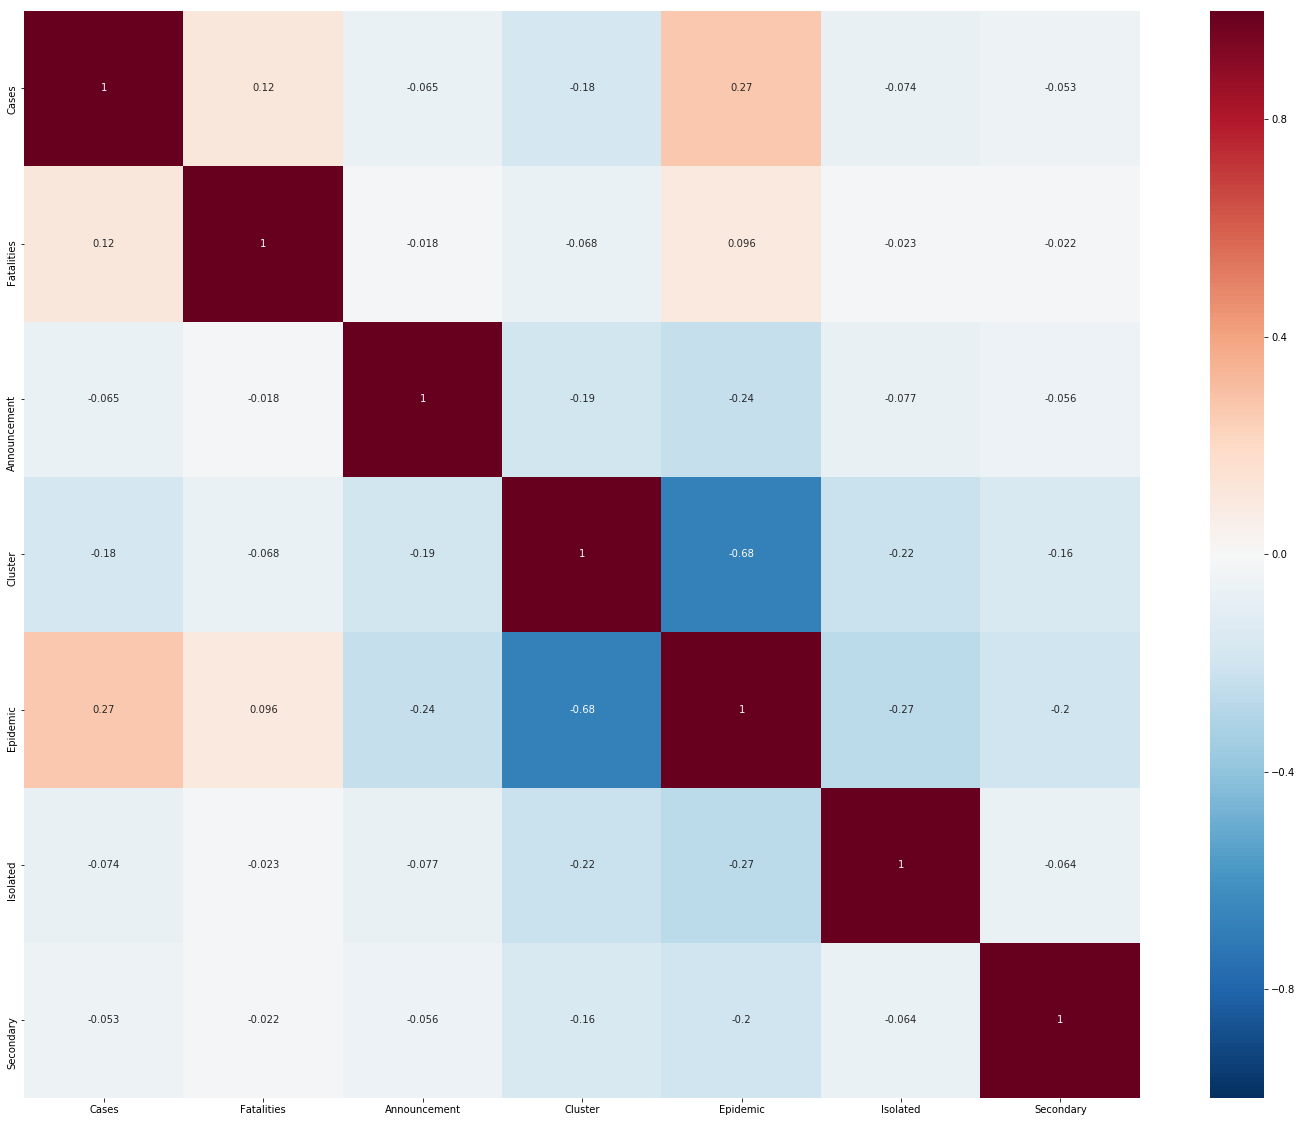

In [141]:
plt.figure(figsize=(25,20))
sns.heatmap(df_europe[Features_eu].corr(), annot=True)

In [142]:
#removed announcements from outbreak since its not a outbreak and its more of a impact scale than outbreak
#remove syria entries
df_europe.drop(185, inplace=True)
df_europe.drop(186, inplace=True)
df_europe.drop(184, inplace=True)
df_europe.drop(187, inplace=True)
df_europe.drop(189, inplace=True)
df_europe.drop(190, inplace=True)
df_europe.drop(191, inplace=True)
df_europe.drop(192, inplace=True)
df_europe.drop(193, inplace=True)
df_europe.drop(194, inplace=True)
df_europe.drop(195, inplace=True)
df_europe.drop(196, inplace=True)
df_europe.drop(197, inplace=True)
df_europe.loc[df_europe["Location"].str.contains("Syria")]

Empty DataFrame
Columns: [Outbreak, Location, Continent, Lat, Long, Date, Year, Cases, Fatalities, Impact Scale, Announcement, Cluster, Epidemic, Isolated, Secondary]
Index: []

In [143]:
#cases to test for the pairplot and heatmap
diseases_europe

['Measles',
 'Mumps',
 'Rubella',
 'Tetanus',
 'Whooping Cough',
 'Fatalities',
 'Cases',
 'Cluster',
 'Epidemic',
 'Secondary',
 'Announcement']

In [144]:
#df_europe[diseases_europe].describe()

# Correlation done by Pearson Correlation Heatmap

In [145]:
plt.figure(figsize=(20,10))

#sns.heatmap(df_europe[diseases_europe].corr(), annot=True)
#europe

In [146]:
plt.figure(figsize=(20,10))
#sns.heatmap(df[diseases_na].corr(), annot=True)
#NA 

# Comparing Both Regions

In [147]:
df_Vaccine_Preven_Map.head() #Original Dataset before any cleaning was done

Category        Outbreak                  Location Continent  \
0           Polio           Polio               Afghanistan      Asia   
1           Polio           Polio               Afghanistan      Asia   
2         Measles         Measles               Afghanistan      Asia   
3           Polio           Polio               Afghanistan      Asia   
4  Whooping Cough  Whooping Cough  Afghanistan (Badakhshan)      Asia   

        Lat       Long            Date  Year  Cases  Fatalities Impact Scale  \
0  33.41310   68.09326  1/2010-12/2010  2010     25           0     Epidemic   
1  33.41310   68.09326  1/2011-12/2011  2011     80           0     Epidemic   
2  33.92513   66.26953  1/2011-12/2011  2011   3013           0     Epidemic   
3  32.54681   64.07227  1/2012-11/2012  2012     37           0     Epidemic   
4  36.73477  70.811995         12/2012  2012    350          12     Epidemic   

                                     Source Citation  \
0  CDC. "Progress Toward Poliomyelitis Eradicatio...   
1  Global Polio Eradication Initiative. "Case bre...   
2  World Health Organization, "WHO: Measles death...   
3  Global Polio Eradication Initiative. "Case\nbr...   
4  Pakistan News Service, "Whooping cough kills 1...   

                                              Source  
0  http://www.cdc.gov/mmwr/preview/mmwrhtml/mm613...  
1  http://www.polioeradication.org/Dataandmonitor...  
2  http://www.who.int/mediacentre/news/notes/2013...  
3  http://www.polioeradication.org/Dataandmonitor...  
4  http://paktribune.com/news/Whooping-cough-kill...

In [148]:
df.head(15)

Outbreak                   Location      Continent        Lat         Long  \
0     Mumps            Canada (Quebec)  North America  51.939964   -73.549136   
1   Measles           Canada (Alberta)  North America  53.933271  -116.576504   
2   Measles  Canada (British Columbia)  North America  53.726668  -127.647621   
3   Measles            Canada (Ottawa)  North America  47.411572   -75.698194   
4   Measles           Canada (Alberta)  North America  55.933270    -117.5765   
5   Measles          Canada (Edmonton)  North America  53.543560   -113.49045   
6     Mumps           Canada (Ontario)  North America  51.253775   -85.323214   
7   Measles            Canada (Ottawa)  North America  46.411572   -75.698194   
8   Measles            Canada (Quebec)  North America  52.939916   -73.549136   
9   Measles            Canada (Quebec)  North America  53.939916   -73.549136   
10  Measles            Canada (Quebec)  North America  52.939920    -73.54914   
11  Measles      Canada (Saskatchewan)  North America  52.939916  -106.450864   
12    Mumps         Canada (Vancouver)  North America  49.261226  -123.113927   
13    Mumps          Canada (Whistler)  North America  50.116168  -122.959423   
14  Measles           Canada (Alberta)  North America  53.543560   -113.49045   

              Date  Year  Cases  Fatalities Impact Scale  Announcement  \
0           6/2009  2009     15           0      Cluster             0   
1           5/2010  2010      4           0    Secondary             0   
2           3/2010  2010     78           0    Secondary             0   
3          12/2010  2010      1           0     Isolated             0   
4          08/2011  2011      1           0     Isolated             0   
5          10/2011  2011      1           0     Isolated             0   
6    7/2011-8/2011  2011     11           0    Secondary             0   
7           1/2011  2011      6           0    Secondary             0   
8           4/2011  2011     36           0      Cluster             0   
9           5/2011  2011      2           0    Secondary             0   
10  1/2011-12/2011  2011    776           0     Epidemic             0   
11  1/2011-12/2011  2011      6           0      Cluster             0   
12   2/2011-7/2011  2011     90           0     Epidemic             0   
13          4/2011  2011     15           0      Cluster             0   
14          3/2012  2012      1           0     Isolated             0   

    Cluster  Epidemic  Isolated  Secondary  
0         1         0         0          0  
1         0         0         0          1  
2         0         0         0          1  
3         0         0         1          0  
4         0         0         1          0  
5         0         0         1          0  
6         0         0         0          1  
7         0         0         0          1  
8         1         0         0          0  
9         0         0         0          1  
10        0         1         0          0  
11        1         0         0          0  
12        0         1         0          0  
13        1         0         0          0  
14        0         0         1          0

In [149]:
df_europe.head(10)

Outbreak            Location Continent        Lat       Long  \
0     Measles    Austria (Styria)    Europe  47.264901  14.893930   
1     Measles             Austria    Europe  47.070120  12.985840   
2     Rubella             Austria    Europe  48.180740  15.468750   
3  Diphtheria             Austria    Europe  48.180740  15.468750   
4     Measles             Austria    Europe  48.180740  15.468750   
5     Measles             Belarus    Europe  54.521280  26.946290   
6     Measles             Belgium    Europe  50.503887   4.469936   
7     Measles             Belgium    Europe  50.545290   4.308010   
8  Diphtheria             Belgium    Europe  51.219450   4.402460   
9     Measles  Belgium (Wallonia)    Europe  51.219450   4.402460   

              Date  Year  Cases  Fatalities Impact Scale  Announcement  \
0           3/2009  2009     37           0    Secondary             0   
1  11/2011-10/2012  2012     35           0      Cluster             0   
2  11/2011-10/2012  2012     10           0     Isolated             0   
3           1/2017  2017      1           0    Secondary             0   
4           1/2017  2017     78           0      Cluster             0   
5           2/2015  2015      1           0     Isolated             0   
6   1/2011-12/2011  2011    192           0     Epidemic             0   
7  11/2011-10/2012  2012     56           0     Epidemic             0   
8           3/2016  2016      1           1     Isolated             0   
9           4/2017  2017    288           0     Epidemic             0   

   Cluster  Epidemic  Isolated  Secondary  
0        0         0         0          1  
1        1         0         0          0  
2        0         0         1          0  
3        0         0         0          1  
4        1         0         0          0  
5        0         0         1          0  
6        0         1         0          0  
7        0         1         0          0  
8        0         0         1          0  
9        0         1         0          0

In [150]:
df_europe['Outbreak'].value_counts() #dfeu is the same as df_europe

Measles               174
Mumps                  34
Rubella                12
Announcement           12
Diphtheria              9
Whooping Cough          7
Meningitis              2
Tetanus                 2
Polio                   2
Chicken Pox             2
Streptococcus suis      1
Name: Outbreak, dtype: int64

In [151]:
df['Outbreak'].value_counts() #North America Outbreaks

Measles           181
Whooping Cough    160
Mumps              67
Announcement       24
Chicken Pox         5
Diphtheria          4
Tetanus             3
Hepatitis A         1
H1N1 Flu            1
Typhoid             1
Meningitis          1
Rotavirus           1
Name: Outbreak, dtype: int64

In [152]:
df_europe['Outbreak'].value_counts() #Europe Outbreaks we can see violence here which was dropped after in calculations and in dummies

Measles               174
Mumps                  34
Rubella                12
Announcement           12
Diphtheria              9
Whooping Cough          7
Meningitis              2
Tetanus                 2
Polio                   2
Chicken Pox             2
Streptococcus suis      1
Name: Outbreak, dtype: int64

In [153]:
df_eu['Impact Scale'].value_counts() #Europe

Epidemic        122
Cluster          97
Isolated         22
Announcement     17
Secondary        12
Name: Impact Scale, dtype: int64

In [154]:
df['Impact Scale'].value_counts() #NorthAmerica

Cluster           179
Isolated          105
Epidemic           95
Secondary          42
Announcement       24
Whooping Cough      3
Name: Impact Scale, dtype: int64

In [155]:
df['Fatalities'].mean()

0.14699331848552338

In [156]:
df_europe['Fatalities'].mean()

0.19066147859922178

In [157]:
df['Cases'].count()

449

In [158]:
df['Cases'].sum()

93810L

In [159]:
df_eu['Cases'].sum()

226456L

In [160]:
df.groupby('Outbreak').describe()

Announcement                                     Cases  \
                      count mean  std  min  25%  50%  75%  max  count   
Outbreak                                                                
Announcement           24.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   24.0   
Chicken Pox             5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    5.0   
Diphtheria              4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    4.0   
H1N1 Flu                1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0    1.0   
Hepatitis A             1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0    1.0   
Measles               181.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  181.0   
Meningitis              1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0    1.0   
Mumps                  67.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   67.0   
Rotavirus               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0    1.0   
Tetanus                 3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    3.0   
Typhoid                 1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0    1.0   
Whooping Cough        160.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  160.0   

                                                                            \
                       mean          std     min      25%     50%      75%   
Outbreak                                                                     
Announcement       0.000000     0.000000     0.0     0.00     0.0     0.00   
Chicken Pox       30.000000    42.455859     2.0     3.00     4.0    41.00   
Diphtheria        28.750000    31.805398     2.0     6.50    20.5    42.75   
H1N1 Flu           1.000000          NaN     1.0     1.00     1.0     1.00   
Hepatitis A      107.000000          NaN   107.0   107.00   107.0   107.00   
Measles           19.033149    82.805656     1.0     1.00     2.0     6.00   
Meningitis         5.000000          NaN     5.0     5.00     5.0     5.00   
Mumps            221.432836   840.735306     1.0     5.00    12.0    57.50   
Rotavirus       4336.000000          NaN  4336.0  4336.00  4336.0  4336.00   
Tetanus            1.666667     1.154701     1.0     1.00     1.0     2.00   
Typhoid            1.000000          NaN     1.0     1.00     1.0     1.00   
Whooping Cough   442.556250  1537.547298     1.0     6.75    27.5   121.25   

                        Cluster                                                \
                    max   count      mean       std  min   25%  50%  75%  max   
Outbreak                                                                        
Announcement        0.0    24.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   
Chicken Pox       100.0     5.0  0.600000  0.547723  0.0  0.00  1.0  1.0  1.0   
Diphtheria         72.0     4.0  0.750000  0.500000  0.0  0.75  1.0  1.0  1.0   
H1N1 Flu            1.0     1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0   
Hepatitis A       107.0     1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0   
Measles           776.0   181.0  0.287293  0.453755  0.0  0.00  0.0  1.0  1.0   
Meningitis          5.0     1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0   
Mumps            5311.0    67.0  0.641791  0.483093  0.0  0.00  1.0  1.0  1.0   
Rotavirus        4336.0     1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0   
Tetanus             3.0     3.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   
Typhoid             1.0     1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0   
Whooping Cough  12000.0   160.0  0.487500  0.501413  0.0  0.00  0.0  1.0  1.0   

               Epidemic                                               \
                  count      mean       std  min  25%  50%  75%  max   
Outbreak                                                               
Announcement       24.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
Chicken Pox         5.0  0.400000  0.547723  0.0  0.0  0.0  1.0  1.0   
Diphtheria          4.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
H1N1 Flu            1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0   
Hepatitis A         1.0  1.0

In [161]:
df_europe.groupby('Outbreak').describe()

Announcement                                            \
                          count      mean       std  min   25%  50%   75%   
Outbreak                                                                    
Announcement               12.0  1.000000  0.000000  1.0  1.00  1.0  1.00   
Chicken Pox                 2.0  0.500000  0.707107  0.0  0.25  0.5  0.75   
Diphtheria                  9.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Measles                   174.0  0.005747  0.075810  0.0  0.00  0.0  0.00   
Meningitis                  2.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Mumps                      34.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Polio                       2.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Rubella                    12.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Streptococcus suis          1.0  0.000000       NaN  0.0  0.00  0.0  0.00   
Tetanus                     2.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Whooping Cough              7.0  0.000000  0.000000  0.0  0.00  0.0  0.00   

                         Cases                                            \
                    max  count         mean           std    min     25%   
Outbreak                                                                   
Announcement        1.0   12.0     0.083333      0.288675    0.0    0.00   
Chicken Pox         1.0    2.0  1152.000000   1629.174024    0.0  576.00   
Diphtheria          0.0    9.0     4.666667      8.440972    1.0    1.00   
Measles             1.0  174.0   584.850575   1736.605809    0.0   11.25   
Meningitis          0.0    2.0     6.000000      5.656854    2.0    4.00   
Mumps               0.0   34.0   647.617647   2798.412256    3.0   23.25   
Polio               0.0    2.0     4.500000      3.535534    2.0    3.25   
Rubella             0.0   12.0  5861.583333  12570.667773   10.0   16.75   
Streptococcus suis  0.0    1.0   930.000000           NaN  930.0  930.00   
Tetanus             0.0    2.0     1.000000      0.000000    1.0    1.00   
Whooping Cough      0.0    7.0  3067.142857   4659.405771    4.0  115.00   

                                             Cluster                           \
                       50%      75%      max   count      mean       std  min   
Outbreak                                                                        
Announcement           0.0     0.00      1.0    12.0  0.000000  0.000000  0.0   
Chicken Pox         1152.0  1728.00   2304.0     2.0  0.000000  0.000000  0.0   
Diphtheria             2.0     3.00     27.0     9.0  0.444444  0.527046  0.0   
Measles               45.5   218.50  14949.0   174.0  0.373563  0.485146  0.0   
Meningitis             6.0     8.00     10.0     2.0  1.000000  0.000000  1.0   
Mumps                 63.5   149.50  16352.0    34.0  0.352941  0.485071  0.0   
Polio                  4.5     5.75      7.0     2.0  0.500000  0.707107  0.0   
Rubella               54.5  2320.50  39122.0    12.0  0.500000  0.522233  0.0   
Streptococcus suis   930.0   930.00    930.0     1.0  0.000000       NaN  0.0   
Tetanus                1.0     1.00      1.0     2.0  0.000000  0.000000  0.0   
Whooping Cough      1080.0  3644.00  12868.0     7.0  0.285714  0.487950  0.0   

                                         Epidemic                           \
                     25%  50%   75%  max    count      mean       std  min   
Outbreak                                                                     
Announcement        0.00  0.0  0.00  0.0     12.0  0.000000  0.000000  0.0   
Chicken Pox         0.00  0.0  0.00  0.0      2.0  0.500000  0.707107  0.0   
Diphtheria          0.00  0.0  1.00  1.0      9.0  0.000000  0.000000  0.0   
Measles             0.00  0.0  1.00  1.0    174.0  0.505747  0.501410  0.0   
Meningitis          1.00  1.0  1.00  1.0      2.0  0.000000  0.000000  0.0   
Mumps               0.00  0.0  1.00  1.0     34.0  0.588235  0.499554  0.0   
Polio               0.25  0.5  0.75  1

In [162]:
diseases_na

['Cases',
 'Epidemic',
 'Cluster',
 'Announcement',
 'Measles',
 'Whooping Cough',
 'Secondary',
 'Mumps',
 'Fatalities']

In [163]:

df_europe.head()

Outbreak          Location Continent        Lat      Long  \
0     Measles  Austria (Styria)    Europe  47.264901  14.89393   
1     Measles           Austria    Europe  47.070120  12.98584   
2     Rubella           Austria    Europe  48.180740  15.46875   
3  Diphtheria           Austria    Europe  48.180740  15.46875   
4     Measles           Austria    Europe  48.180740  15.46875   

              Date  Year  Cases  Fatalities Impact Scale  Announcement  \
0           3/2009  2009     37           0    Secondary             0   
1  11/2011-10/2012  2012     35           0      Cluster             0   
2  11/2011-10/2012  2012     10           0     Isolated             0   
3           1/2017  2017      1           0    Secondary             0   
4           1/2017  2017     78           0      Cluster             0   

   Cluster  Epidemic  Isolated  Secondary  
0        0         0         0          1  
1        1         0         0          0  
2        0         0         1          0  
3        0         0         0          1  
4        1         0         0          0

In [164]:
df_europe.columns

Index([u'Outbreak', u'Location', u'Continent', u'Lat', u'Long', u'Date',
       u'Year', u'Cases', u'Fatalities', u'Impact Scale', u'Announcement',
       u'Cluster', u'Epidemic', u'Isolated', u'Secondary'],
      dtype='object')

In [165]:
df_europe.iloc[19,6] = 2017

In [166]:
df_europe['Year'].value_counts()

2012    41
2013    36
2017    33
2014    32
2011    29
2015    22
2009    22
2016    20
2010    16
2008     6
Name: Year, dtype: int64

In [167]:
df.tail()

Outbreak                          Location      Continent  \
444    Announcement      U.S. (Boston, Massachusetts)  North America   
445  Whooping Cough          U.S. (Seymour, Kentucky)  North America   
446  Whooping Cough          U.S. (Henrico, Virginia)  North America   
447  Whooping Cough  U.S. (Skagit County, Washington)  North America   
448         Measles       U.S. (Queensbury, New York)  North America   

           Lat         Long                 Date  Year  Cases  Fatalities  \
444  42.363176   -71.068830  2017-06-01 00:00:00  2017      0           0   
445  37.165887   -85.803305  2017-05-01 00:00:00  2017      6           0   
446  37.505933   -77.332443  2017-06-01 00:00:00  2017      2           0   
447  48.424196  -121.711436  2017-06-01 00:00:00  2017      9           0   
448  43.295764   -73.690162  2017-06-01 00:00:00  2017      1           0   

       Impact Scale  Announcement  Cluster  Epidemic  Isolated  Secondary  
444    Announcement             1        0         0         0          0  
445  Whooping Cough             0        0         0         0          0  
446  Whooping Cough             0        0         0         0          0  
447  Whooping Cough             0        0         0         0          0  
448        Isolated             0        0         0         1          0

In [168]:
df.iloc[447,9]='Secondary'
df.iloc[446,9]='Secondary'
df.iloc[445,9]='Secondary'

In [169]:
df.head()#North America DataFrame

Outbreak                   Location      Continent        Lat         Long  \
0    Mumps            Canada (Quebec)  North America  51.939964   -73.549136   
1  Measles           Canada (Alberta)  North America  53.933271  -116.576504   
2  Measles  Canada (British Columbia)  North America  53.726668  -127.647621   
3  Measles            Canada (Ottawa)  North America  47.411572   -75.698194   
4  Measles           Canada (Alberta)  North America  55.933270    -117.5765   

      Date  Year  Cases  Fatalities Impact Scale  Announcement  Cluster  \
0   6/2009  2009     15           0      Cluster             0        1   
1   5/2010  2010      4           0    Secondary             0        0   
2   3/2010  2010     78           0    Secondary             0        0   
3  12/2010  2010      1           0     Isolated             0        0   
4  08/2011  2011      1           0     Isolated             0        0   

   Epidemic  Isolated  Secondary  
0         0         0          0  
1         0         0          1  
2         0         0          1  
3         0         1          0  
4         0         1          0

In [170]:
#remove all the dummies of the disease

In [171]:
df_europe.groupby("Outbreak").describe()

Announcement                                            \
                          count      mean       std  min   25%  50%   75%   
Outbreak                                                                    
Announcement               12.0  1.000000  0.000000  1.0  1.00  1.0  1.00   
Chicken Pox                 2.0  0.500000  0.707107  0.0  0.25  0.5  0.75   
Diphtheria                  9.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Measles                   174.0  0.005747  0.075810  0.0  0.00  0.0  0.00   
Meningitis                  2.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Mumps                      34.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Polio                       2.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Rubella                    12.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Streptococcus suis          1.0  0.000000       NaN  0.0  0.00  0.0  0.00   
Tetanus                     2.0  0.000000  0.000000  0.0  0.00  0.0  0.00   
Whooping Cough              7.0  0.000000  0.000000  0.0  0.00  0.0  0.00   

                         Cases                                            \
                    max  count         mean           std    min     25%   
Outbreak                                                                   
Announcement        1.0   12.0     0.083333      0.288675    0.0    0.00   
Chicken Pox         1.0    2.0  1152.000000   1629.174024    0.0  576.00   
Diphtheria          0.0    9.0     4.666667      8.440972    1.0    1.00   
Measles             1.0  174.0   584.850575   1736.605809    0.0   11.25   
Meningitis          0.0    2.0     6.000000      5.656854    2.0    4.00   
Mumps               0.0   34.0   647.617647   2798.412256    3.0   23.25   
Polio               0.0    2.0     4.500000      3.535534    2.0    3.25   
Rubella             0.0   12.0  5861.583333  12570.667773   10.0   16.75   
Streptococcus suis  0.0    1.0   930.000000           NaN  930.0  930.00   
Tetanus             0.0    2.0     1.000000      0.000000    1.0    1.00   
Whooping Cough      0.0    7.0  3067.142857   4659.405771    4.0  115.00   

                                             Cluster                           \
                       50%      75%      max   count      mean       std  min   
Outbreak                                                                        
Announcement           0.0     0.00      1.0    12.0  0.000000  0.000000  0.0   
Chicken Pox         1152.0  1728.00   2304.0     2.0  0.000000  0.000000  0.0   
Diphtheria             2.0     3.00     27.0     9.0  0.444444  0.527046  0.0   
Measles               45.5   218.50  14949.0   174.0  0.373563  0.485146  0.0   
Meningitis             6.0     8.00     10.0     2.0  1.000000  0.000000  1.0   
Mumps                 63.5   149.50  16352.0    34.0  0.352941  0.485071  0.0   
Polio                  4.5     5.75      7.0     2.0  0.500000  0.707107  0.0   
Rubella               54.5  2320.50  39122.0    12.0  0.500000  0.522233  0.0   
Streptococcus suis   930.0   930.00    930.0     1.0  0.000000       NaN  0.0   
Tetanus                1.0     1.00      1.0     2.0  0.000000  0.000000  0.0   
Whooping Cough      1080.0  3644.00  12868.0     7.0  0.285714  0.487950  0.0   

                                         Epidemic                           \
                     25%  50%   75%  max    count      mean       std  min   
Outbreak                                                                     
Announcement        0.00  0.0  0.00  0.0     12.0  0.000000  0.000000  0.0   
Chicken Pox         0.00  0.0  0.00  0.0      2.0  0.500000  0.707107  0.0   
Diphtheria          0.00  0.0  1.00  1.0      9.0  0.000000  0.000000  0.0   
Measles             0.00  0.0  1.00  1.0    174.0  0.505747  0.501410  0.0   
Meningitis          1.00  1.0  1.00  1.0      2.0  0.000000  0.000000  0.0   
Mumps               0.00  0.0  1.00  1.0     34.0  0.588235  0.499554  0.0   
Polio               0.25  0.5  0.75  1

In [172]:
#change Diptherina to Diphteria

In [173]:
df_europe['Outbreak'].replace("Diphteria",'Diphtheria', inplace=True)


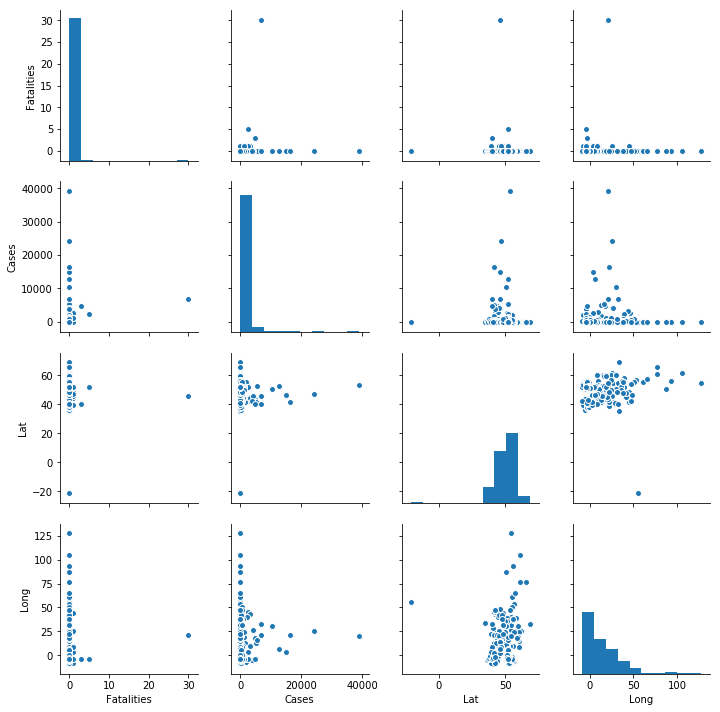

In [174]:
sns.pairplot(df_europe[['Fatalities','Cases','Lat','Long']])

In [175]:
df_europe[['Fatalities','Cases','Lat','Long']].corr()

Fatalities     Cases       Lat      Long
Fatalities    1.000000  0.116855 -0.043076  0.001564
Cases         0.116855  1.000000 -0.056121  0.034320
Lat          -0.043076 -0.056121  1.000000  0.026164
Long          0.001564  0.034320  0.026164  1.000000

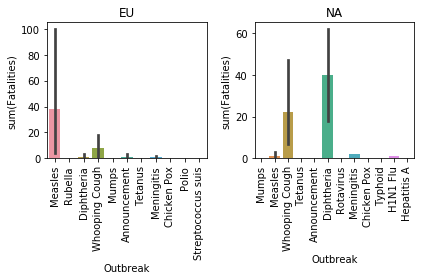

In [176]:
plt.subplot(1,2,1)
plt.title("EU")
sns.barplot(x=df_europe.Outbreak, y=df_europe["Fatalities"],estimator=sum, orient="v")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("NA")
sns.barplot(x=df.Outbreak, y=df["Fatalities"],estimator=sum)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

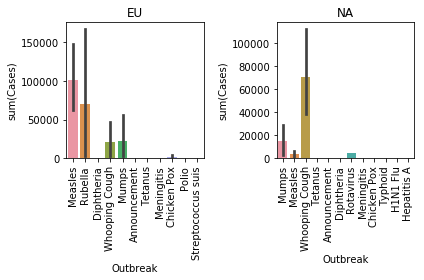

In [177]:
plt.subplot(1,2,1)
plt.title("EU")
sns.barplot(x=df_europe.Outbreak, y=df_europe["Cases"],estimator=sum, orient="v")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("NA")
sns.barplot(x=df.Outbreak, y=df["Cases"], estimator=sum)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

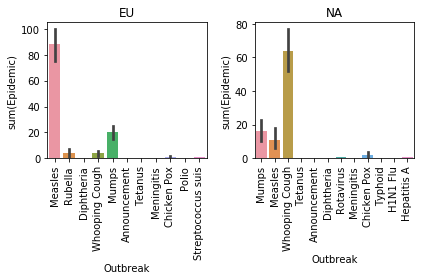

In [178]:
plt.subplot(1,2,1)
plt.title("EU")
sns.barplot(x=df_europe.Outbreak, y=df_europe["Epidemic"],estimator=sum, orient="v")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("NA")
sns.barplot(x=df.Outbreak, y=df["Epidemic"], estimator=sum)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

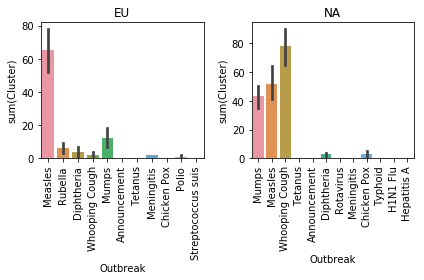

In [179]:
plt.subplot(1,2,1)
plt.title("EU")
sns.barplot(x=df_europe.Outbreak, y=df_europe["Cluster"],estimator=sum, orient="v")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("NA")
sns.barplot(x=df.Outbreak, y=df["Cluster"], estimator=sum)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

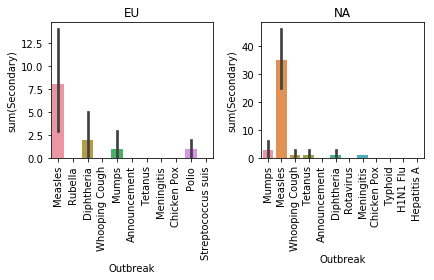

In [180]:
plt.subplot(1,2,1)
plt.title("EU")
sns.barplot(x=df_europe.Outbreak, y=df_europe["Secondary"],estimator=sum, orient="v")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("NA")
sns.barplot(x=df.Outbreak, y=df["Secondary"], estimator=sum)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

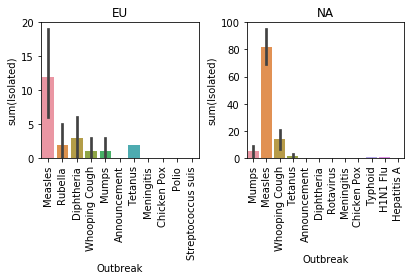

In [181]:
plt.subplot(1,2,1)
plt.title("EU")
sns.barplot(x=df_europe.Outbreak, y=df_europe["Isolated"],estimator=sum, orient="v")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("NA")
sns.barplot(x=df.Outbreak, y=df["Isolated"], estimator=sum)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [182]:
#Merge NA and EU?
df_europe["Continent"]="EU"


In [183]:
df_europe.head()

Outbreak          Location Continent        Lat      Long  \
0     Measles  Austria (Styria)        EU  47.264901  14.89393   
1     Measles           Austria        EU  47.070120  12.98584   
2     Rubella           Austria        EU  48.180740  15.46875   
3  Diphtheria           Austria        EU  48.180740  15.46875   
4     Measles           Austria        EU  48.180740  15.46875   

              Date  Year  Cases  Fatalities Impact Scale  Announcement  \
0           3/2009  2009     37           0    Secondary             0   
1  11/2011-10/2012  2012     35           0      Cluster             0   
2  11/2011-10/2012  2012     10           0     Isolated             0   
3           1/2017  2017      1           0    Secondary             0   
4           1/2017  2017     78           0      Cluster             0   

   Cluster  Epidemic  Isolated  Secondary  
0        0         0         0          1  
1        1         0         0          0  
2        0         0         1          0  
3        0         0         0          1  
4        1         0         0          0

In [184]:
df.head()

Outbreak                   Location      Continent        Lat         Long  \
0    Mumps            Canada (Quebec)  North America  51.939964   -73.549136   
1  Measles           Canada (Alberta)  North America  53.933271  -116.576504   
2  Measles  Canada (British Columbia)  North America  53.726668  -127.647621   
3  Measles            Canada (Ottawa)  North America  47.411572   -75.698194   
4  Measles           Canada (Alberta)  North America  55.933270    -117.5765   

      Date  Year  Cases  Fatalities Impact Scale  Announcement  Cluster  \
0   6/2009  2009     15           0      Cluster             0        1   
1   5/2010  2010      4           0    Secondary             0        0   
2   3/2010  2010     78           0    Secondary             0        0   
3  12/2010  2010      1           0     Isolated             0        0   
4  08/2011  2011      1           0     Isolated             0        0   

   Epidemic  Isolated  Secondary  
0         0         0          0  
1         0         0          1  
2         0         0          1  
3         0         1          0  
4         0         1          0

In [185]:
df_world = pd.concat([df,df_europe],axis=0,ignore_index=True)
df_world

Outbreak                                      Location  \
0                 Mumps                               Canada (Quebec)   
1               Measles                              Canada (Alberta)   
2               Measles                     Canada (British Columbia)   
3               Measles                               Canada (Ottawa)   
4               Measles                              Canada (Alberta)   
5               Measles                             Canada (Edmonton)   
6                 Mumps                              Canada (Ontario)   
7               Measles                               Canada (Ottawa)   
8               Measles                               Canada (Quebec)   
9               Measles                               Canada (Quebec)   
10              Measles                               Canada (Quebec)   
11              Measles                         Canada (Saskatchewan)   
12                Mumps                            Canada (Vancouver)   
13                Mumps                             Canada (Whistler)   
14              Measles                              Canada (Alberta)   
15       Whooping Cough                     Canada (British Columbia)   
16       Whooping Cough                             Canada (Montreal)   
17       Whooping Cough                        Canada (New Brunswick)   
18              Measles                              Canada (Ontario)   
19              Measles                         Canada (Saskatchewan)   
20       Whooping Cough                      Canada (Yukon Territory)   
21              Measles                     Canada (British Columbia)   
22              Measles                     Canada (British Columbia)   
23              Measles                              Canada (Calgary)   
24              Measles                               Canada (Halton)   
25              Measles                               Canada (Halton)   
26              Measles                        Canada (New Brunswick)   
27              Measles                              Canada (Ontario)   
28              Measles                 Canada (Prince Edward Island)   
29              Measles                               Canada (Quebec)   
30              Measles                         Canada (Saskatchewan)   
31              Measles                     Canada (Southern Alberta)   
32              Measles                      Canada (Toronto Ontario)   
33              Measles                              Canada (Alberta)   
34              Measles                     Canada (British Columbia)   
35       Whooping Cough                              Canada (Calgary)   
36              Measles                        Canada (Fort McMurray)   
37              Measles                             Canada (Hamilton)   
38              Measles                             Canada (Manitoba)   
39       Whooping Cough         Canada (North Coast British Columbia)   
40              Measles                         Canada (Ontario Peel)   
41              Measles                Canada (Ontario Simcoe County)   
42              Measles                              Canada (Ontario)   
43              Measles                               Canada (Ottawa)   
44       Whooping Cough                 Canada (Prince Edward Island)   
45              Measles                            Canada (Saskatoon)   
46              Measles                         Canada (Sasketchawan)   
47              Measles                     Canada (British Columbia)   
48       Whooping Cough                              Canada (Calgary)   
49              Measles                             Canada (Manitoba)   
50       Whooping Cough                             Canada (Manitoba)   
51       Whooping Cough                        Canada (New Brunswick)   
52       Whooping Cough                            Canada (Saskatoon)   
53       Whooping Cough  Canada (Ontario, Bruce County, Huron County)   


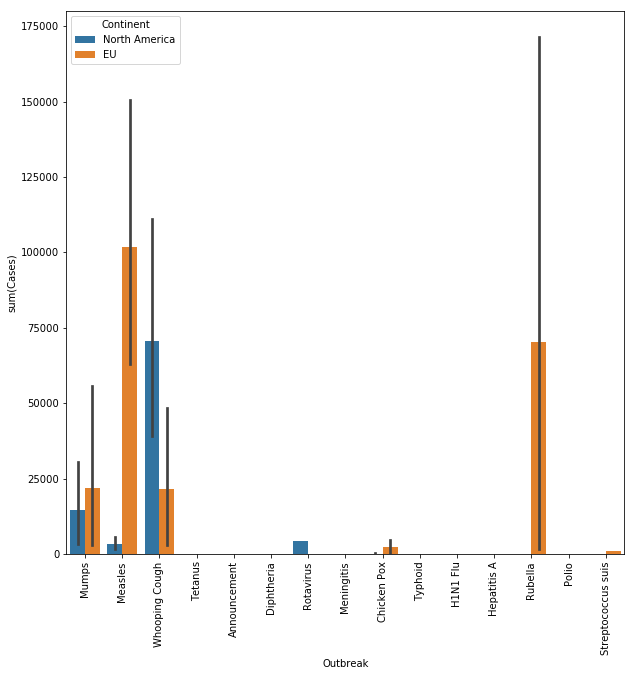

In [186]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_world.Outbreak, y=df_world["Cases"],hue="Continent",estimator=sum, orient="v",data=df_world)
plt.xticks(rotation=90)
plt.show()

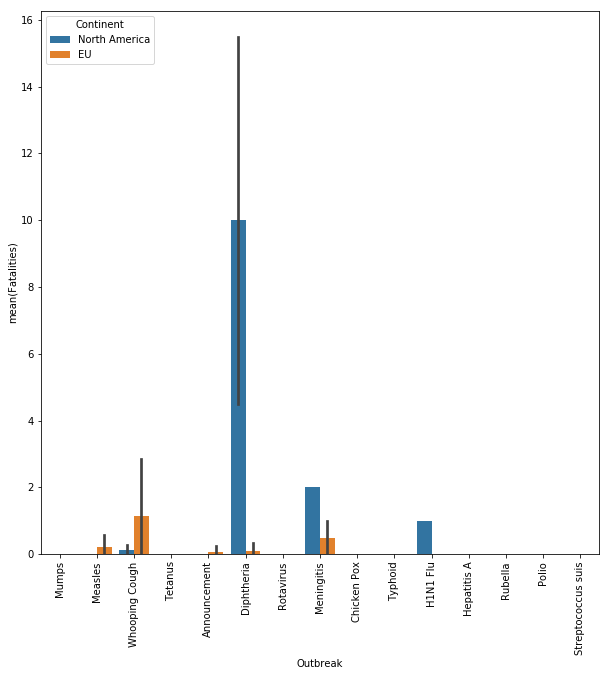

In [187]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_world.Outbreak, y=df_world["Fatalities"],hue="Continent", orient="v",data=df_world)
plt.xticks(rotation=90)
plt.show()

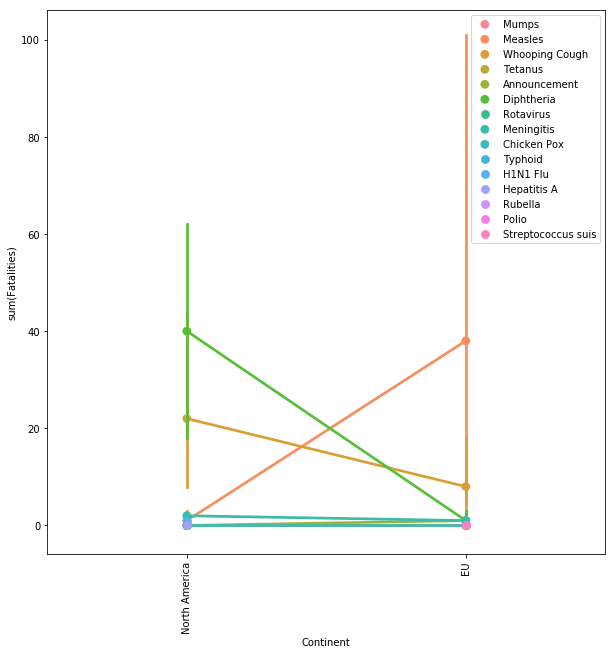

In [188]:
plt.figure(figsize=(10,10))
sns.pointplot(x=df_world.Continent, y=df_world.Fatalities, data=df_world, hue="Outbreak", estimator=sum)
plt.xticks(rotation=90)
plt.legend(loc='upper right')

In [189]:
df_world.groupby("Outbreak").describe()

Announcement                                               \
                          count      mean       std  min  25%  50%  75%  max   
Outbreak                                                                       
Announcement               36.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Chicken Pox                 7.0  0.142857  0.377964  0.0  0.0  0.0  0.0  1.0   
Diphtheria                 13.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
H1N1 Flu                    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0   
Hepatitis A                 1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0   
Measles                   355.0  0.002817  0.053074  0.0  0.0  0.0  0.0  1.0   
Meningitis                  3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
Mumps                     101.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
Polio                       2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
Rotavirus                   1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0   
Rubella                    12.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
Streptococcus suis          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0   
Tetanus                     5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
Typhoid                     1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0   
Whooping Cough            167.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

                    Cases                                                      \
                    count         mean           std     min      25%     50%   
Outbreak                                                                        
Announcement         36.0     0.027778      0.166667     0.0     0.00     0.0   
Chicken Pox           7.0   350.571429    862.150771     0.0     2.50     4.0   
Diphtheria           13.0    12.076923     20.838512     1.0     1.00     2.0   
H1N1 Flu              1.0     1.000000           NaN     1.0     1.00     1.0   
Hepatitis A           1.0   107.000000           NaN   107.0   107.00   107.0   
Measles             355.0   296.363380   1248.015127     0.0     1.00     7.0   
Meningitis            3.0     5.666667      4.041452     2.0     3.50     5.0   
Mumps               101.0   364.900990   1758.335801     1.0     6.00    18.0   
Polio                 2.0     4.500000      3.535534     2.0     3.25     4.5   
Rotavirus             1.0  4336.000000           NaN  4336.0  4336.00  4336.0   
Rubella              12.0  5861.583333  12570.667773    10.0    16.75    54.5   
Streptococcus suis    1.0   930.000000           NaN   930.0   930.00   930.0   
Tetanus               5.0     1.400000      0.894427     1.0     1.00     1.0   
Typhoid               1.0     1.000000           NaN     1.0     1.00     1.0   
Whooping Cough      167.0   552.568862   1824.106669     1.0     7.00    30.0   

                                     Cluster                                 \
                        75%      max   count      mean       std  min   25%   
Outbreak                                                                      
Announcement           0.00      1.0    36.0  0.000000  0.000000  0.0  0.00   
Chicken Pox           70.50   2304.0     7.0  0.428571  0.534522  0.0  0.00   
Diphtheria             8.00     72.0    13.0  0.538462  0.518875  0.0  0.00   
H1N1 Flu               1.00      1.0     1.0  0.000000       NaN  0.0  0.00   
Hepatitis A          107.00    107.0     1.0  0.000000       NaN  0.0  0.00   
Measles               60.00  14949.0   355.0  0.329577  0.470723  0.0  0.00   
Meningitis             7.50     10.0     3.0  0.666667  0.577350  0.0  0.50   
Mumps                101.00  16352.0   101.0  0.544554  0.500495  0.0  0.00   
Polio                  5.75      7.0     2.0  0.500000  0.707107  0.0  0.25   
Rotavirus           4336.00   4336.0     1.0  0.000000       NaN  0.0  0.00   
Rubella             2320.50  39122.0    12.0  0.500000  0.522233  0.0  0.00   
Streptococcus

In [190]:
#remember to remove syria from df_europe

In [191]:
df_world.iloc[47,4] = -122.80000
df_world["Long"]
df_world["Long"]= df_world.Long.astype(float,inplace=True)

In [192]:
df_world.groupby("Outbreak").sum()
#world is only NA and EU

Lat          Long   Cases  Fatalities  \
Outbreak                                                             
Announcement         1501.453594  -2175.366590       1           1   
Chicken Pox           293.663228   -391.487305    2454           0   
Diphtheria            545.862616   -210.919527     157          41   
H1N1 Flu               38.907192    -77.036871       1           1   
Hepatitis A            44.314844    -85.602364     107           0   
Measles             16116.445752 -13712.349334  105209          39   
Meningitis            139.898677    -59.526365      17           3   
Mumps                4413.092066  -6154.989348   36855           0   
Polio                 110.144810    127.606636       9           0   
Rotavirus              15.783471    -90.230759    4336           0   
Rubella               592.723751    154.394763   70339           0   
Streptococcus suis     55.755786     37.617633     930           0   
Tetanus               212.584369   -228.575256       7           0   
Typhoid                37.769220   -122.448140       1           0   
Whooping Cough       7019.905715 -14953.185345   92279          30   

                    Announcement  Cluster  Epidemic  Isolated  Secondary  
Outbreak                                                                  
Announcement                  36        0         0         0          0  
Chicken Pox                    1        3         3         0          0  
Diphtheria                     0        7         0         3          3  
H1N1 Flu                       0        0         0         1          0  
Hepatitis A                    0        0         1         0          0  
Measles                        1      117        99        94         43  
Meningitis                     0        2         0         0          1  
Mumps                          0       55        36         6          4  
Polio                          0        1         0         0          1  
Rotavirus                      0        0         1         0          0  
Rubella                        0        6         4         2          0  
Streptococcus suis             0        0         1         0          0  
Tetanus                        0        0         0         4          1  
Typhoid                        0        0         0         1          0  
Whooping Cough                 0       80        68        15          1

In [193]:
df_world.groupby("Outbreak").mean()

Lat        Long        Cases  Fatalities  \
Outbreak                                                             
Announcement        41.707044  -60.426850     0.027778    0.027778   
Chicken Pox         41.951890  -55.926758   350.571429    0.000000   
Diphtheria          41.989432  -16.224579    12.076923    3.153846   
H1N1 Flu            38.907192  -77.036871     1.000000    1.000000   
Hepatitis A         44.314844  -85.602364   107.000000    0.000000   
Measles             45.398439  -38.626336   296.363380    0.109859   
Meningitis          46.632892  -19.842122     5.666667    1.000000   
Mumps               43.693981  -60.940489   364.900990    0.000000   
Polio               55.072405   63.803318     4.500000    0.000000   
Rotavirus           15.783471  -90.230759  4336.000000    0.000000   
Rubella             49.393646   12.866230  5861.583333    0.000000   
Streptococcus suis  55.755786   37.617633   930.000000    0.000000   
Tetanus             42.516874  -45.715051     1.400000    0.000000   
Typhoid             37.769220 -122.448140     1.000000    0.000000   
Whooping Cough      42.035364  -89.540032   552.568862    0.179641   

                    Announcement   Cluster  Epidemic  Isolated  Secondary  
Outbreak                                                                   
Announcement            1.000000  0.000000  0.000000  0.000000   0.000000  
Chicken Pox             0.142857  0.428571  0.428571  0.000000   0.000000  
Diphtheria              0.000000  0.538462  0.000000  0.230769   0.230769  
H1N1 Flu                0.000000  0.000000  0.000000  1.000000   0.000000  
Hepatitis A             0.000000  0.000000  1.000000  0.000000   0.000000  
Measles                 0.002817  0.329577  0.278873  0.264789   0.121127  
Meningitis              0.000000  0.666667  0.000000  0.000000   0.333333  
Mumps                   0.000000  0.544554  0.356436  0.059406   0.039604  
Polio                   0.000000  0.500000  0.000000  0.000000   0.500000  
Rotavirus               0.000000  0.000000  1.000000  0.000000   0.000000  
Rubella                 0.000000  0.500000  0.333333  0.166667   0.000000  
Streptococcus suis      0.000000  0.000000  1.000000  0.000000   0.000000  
Tetanus                 0.000000  0.000000  0.000000  0.800000   0.200000  
Typhoid                 0.000000  0.000000  0.000000  1.000000   0.000000  
Whooping Cough          0.000000  0.479042  0.407186  0.089820   0.005988

In [194]:
df_europe.groupby("Outbreak").mean()

Lat       Long        Cases  Fatalities  \
Outbreak                                                            
Announcement        47.609094  11.352492     0.083333    0.083333   
Chicken Pox         53.490080  19.282135  1152.000000    0.000000   
Diphtheria          52.287795   8.457887     4.666667    0.111111   
Measles             49.556812  17.386704   584.850575    0.218391   
Meningitis          50.174313  23.127851     6.000000    0.500000   
Mumps               50.891962  -0.463248   647.617647    0.000000   
Polio               55.072405  63.803318     4.500000    0.000000   
Rubella             49.393646  12.866230  5861.583333    0.000000   
Streptococcus suis  55.755786  37.617633   930.000000    0.000000   
Tetanus             42.930581  11.118843     1.000000    0.000000   
Whooping Cough      49.345202  -1.419789  3067.142857    1.142857   

                    Announcement   Cluster  Epidemic  Isolated  Secondary  
Outbreak                                                                   
Announcement            1.000000  0.000000  0.000000  0.000000   0.000000  
Chicken Pox             0.500000  0.000000  0.500000  0.000000   0.000000  
Diphtheria              0.000000  0.444444  0.000000  0.333333   0.222222  
Measles                 0.005747  0.373563  0.505747  0.068966   0.045977  
Meningitis              0.000000  1.000000  0.000000  0.000000   0.000000  
Mumps                   0.000000  0.352941  0.588235  0.029412   0.029412  
Polio                   0.000000  0.500000  0.000000  0.000000   0.500000  
Rubella                 0.000000  0.500000  0.333333  0.166667   0.000000  
Streptococcus suis      0.000000  0.000000  1.000000  0.000000   0.000000  
Tetanus                 0.000000  0.000000  0.000000  1.000000   0.000000  
Whooping Cough          0.000000  0.285714  0.571429  0.142857   0.000000

In [195]:
df_europe.groupby("Outbreak").sum()

Lat         Long   Cases  Fatalities  \
Outbreak                                                           
Announcement         571.309130   136.229904       1           1   
Chicken Pox          106.980160    38.564271    2304           0   
Diphtheria           470.590156    76.120979      42           1   
Measles             8622.885218  3025.286505  101764          38   
Meningitis           100.348626    46.255702      12           1   
Mumps               1730.326695   -15.750416   22019           0   
Polio                110.144810   127.606636       9           0   
Rubella              592.723751   154.394763   70339           0   
Streptococcus suis    55.755786    37.617633     930           0   
Tetanus               85.861162    22.237686       2           0   
Whooping Cough       345.416417    -9.938520   21470           8   

                    Announcement  Cluster  Epidemic  Isolated  Secondary  
Outbreak                                                                  
Announcement                  12        0         0         0          0  
Chicken Pox                    1        0         1         0          0  
Diphtheria                     0        4         0         3          2  
Measles                        1       65        88        12          8  
Meningitis                     0        2         0         0          0  
Mumps                          0       12        20         1          1  
Polio                          0        1         0         0          1  
Rubella                        0        6         4         2          0  
Streptococcus suis             0        0         1         0          0  
Tetanus                        0        0         0         2          0  
Whooping Cough                 0        2         4         1          0

In [196]:
df.groupby("Outbreak").sum()
#North America

Lat  Cases  Fatalities  Announcement  Cluster  \
Outbreak                                                                
Announcement     930.144464      0           0            24        0   
Chicken Pox      186.683068    150           0             0        3   
Diphtheria        75.272460    115          40             0        3   
H1N1 Flu          38.907192      1           1             0        0   
Hepatitis A       44.314844    107           0             0        0   
Measles         7493.560534   3445           1             0       52   
Meningitis        39.550051      5           2             0        0   
Mumps           2682.765371  14836           0             0       43   
Rotavirus         15.783471   4336           0             0        0   
Tetanus          126.723207      5           0             0        0   
Typhoid           37.769220      1           0             0        0   
Whooping Cough  6674.489298  70809          22             0       78   

                Epidemic  Isolated  Secondary  
Outbreak                                       
Announcement           0         0          0  
Chicken Pox            2         0          0  
Diphtheria             0         0          1  
H1N1 Flu               0         1          0  
Hepatitis A            1         0          0  
Measles               11        82         35  
Meningitis             0         0          1  
Mumps                 16         5          3  
Rotavirus              1         0          0  
Tetanus                0         2          1  
Typhoid                0         1          0  
Whooping Cough        64        14          1

In [197]:
df.groupby("Outbreak").mean()

Lat        Cases  Fatalities  Announcement   Cluster  \
Outbreak                                                                     
Announcement    38.756019     0.000000    0.000000           1.0  0.000000   
Chicken Pox     37.336614    30.000000    0.000000           0.0  0.600000   
Diphtheria      18.818115    28.750000   10.000000           0.0  0.750000   
H1N1 Flu        38.907192     1.000000    1.000000           0.0  0.000000   
Hepatitis A     44.314844   107.000000    0.000000           0.0  0.000000   
Measles         41.400887    19.033149    0.005525           0.0  0.287293   
Meningitis      39.550051     5.000000    2.000000           0.0  0.000000   
Mumps           40.041274   221.432836    0.000000           0.0  0.641791   
Rotavirus       15.783471  4336.000000    0.000000           0.0  0.000000   
Tetanus         42.241069     1.666667    0.000000           0.0  0.000000   
Typhoid         37.769220     1.000000    0.000000           0.0  0.000000   
Whooping Cough  41.715558   442.556250    0.137500           0.0  0.487500   

                Epidemic  Isolated  Secondary  
Outbreak                                       
Announcement    0.000000  0.000000   0.000000  
Chicken Pox     0.400000  0.000000   0.000000  
Diphtheria      0.000000  0.000000   0.250000  
H1N1 Flu        0.000000  1.000000   0.000000  
Hepatitis A     1.000000  0.000000   0.000000  
Measles         0.060773  0.453039   0.193370  
Meningitis      0.000000  0.000000   1.000000  
Mumps           0.238806  0.074627   0.044776  
Rotavirus       1.000000  0.000000   0.000000  
Tetanus         0.000000  0.666667   0.333333  
Typhoid         0.000000  1.000000   0.000000  
Whooping Cough  0.400000  0.087500   0.006250

# Model building DBSCAN
## make a label encoder on Outbreaks


In [199]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
#from mpl_toolkits.basemap import Basemap



In [200]:
df_world["Outbreak"].map(lambda x: x in ["Polio","H1N1 Flu","Hepatitis A","Typhoid","Streptococcus suis","Rotavirus","Tetanus","Chicken Pox"] )
df_world = df_world.loc[df_world["Outbreak"].map(lambda x: x not in ["Polio","H1N1 Flu","Hepatitis A","Typhoid","Streptococcus suis","Rotavirus","Tetanus","Chicken Pox",'Streptococcus suis'])]

le = LabelEncoder()
def Encode_diseases(df):
    df["Encoded Diseases"]=le.fit_transform(df["Outbreak"])
    return df

In [201]:
Encode_diseases(df_world)
df_world["Encoded Diseases"]= df_world["Encoded Diseases"].astype("category")

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [202]:
Cord = df_world.as_matrix(columns=["Lat","Long"])
km_per_radian = 6371.0088
epsilon = 100./km_per_radian

dbs = DBSCAN(eps=epsilon, min_samples=2, metric='precomputed').fit(distance_matrix)

NameError: name 'distance_matrix' is not defined

In [203]:
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
nclusters = len(set(labels))
print n_clusters_
#get clusters
np.unique(labels)


NameError: name 'dbs' is not defined

In [204]:
#Lat Cord[:,0]
#Long Cord[:,1]

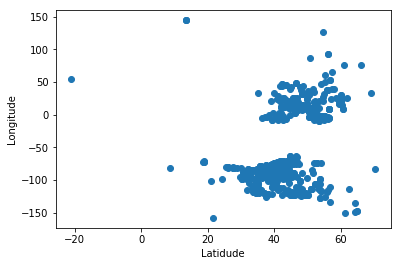

In [205]:
plt.scatter(Cord[:,0], Cord[:,1])
plt.xlabel("Latidude")
plt.ylabel("Longitude")

In [206]:
metrics.silhouette_score(df_world[["Lat","Long"]], labels)

NameError: name 'labels' is not defined

In [207]:
#core_samples = np.zeros_like(labels, dtype = bool)  
#core_samples[dbs.core_sample_indices_] = True 
df_world.head()
location = gv.Dataset(df_world, kdims=['Location','Continent','Year'])
df_world_gp = gpd.GeoDataFrame(df_world, geometry=None).set_geometry(
[Point(r.Long,r.Lat)for _,r in df_world.iterrows()],crs={"init":"EPSG:4326"})


In [208]:
%%opts Overlay[width=900 height=400 yaxis=None xaxis=None] Points(alpha=.2)
Location_cases = gv.Dataset((df_world_gp.Long, df_world_gp.Lat),
                             kdims=['longitude','latitude'],crs=ccrs.PlateCarree())
gv.WMTS(CARTODBPOSITRON_RETINA) * Location_cases.to(gv.Points)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]

In [501]:
haversine = DistanceMetric.get_metric("haversine")
cord_rad = df_world_gp[["Lat","Long"]].values * np.pi /180.0
earth_radius_km = 6371.0
#haversine takes nX2 array of lat and lon in radian it returns
#the distance in radians as well so it needs to be multiplied by the radius
#of the eath in a real distance unit
distance_matrix = haversine.pairwise(cord_rad) * earth_radius_km

In [502]:
dbs_model = DBSCAN(eps=190, min_samples=3, metric="precomputed")
#190 km
#3 occurences due to being pretty rare diseases
#pre computed means it will get a full distance matrix instead of a matrix of xy pairs

In [503]:
clus = dbs_model.fit(distance_matrix)
clos = dbs_model.fit_predict(distance_matrix)
labels = dbs_model.labels_


In [504]:
n_cluster = len(set(labels))-(1 if -1 in labels else 0)
n_cluster

45

In [505]:
print ("Silhoutte Coefficcient: ",metrics.silhouette_score(df_world_gp[["Lat","Long"]], labels))
print("number of clusters", n_cluster)


('Silhoutte Coefficcient: ', 0.20511596453622485)
('number of clusters', 45)


In [506]:
core_sam = np.zeros_like(labels, dtype=bool)
core_sam[dbs_model.core_sample_indices_]=True
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

In [507]:
df_world.shape

(687, 18)

In [508]:
#ADD CLUSTERS TO GEOPANDAS DF_WORLD and Dataframe df_world
df_world_gp.loc[:,"clusters"] = clos
df_world.loc[:,"clusters"] = clos

In [509]:
sighting_polygons = [sighting_group.geometry.unary_union.convex_hull for cluster, sighting_group in df_world_gp.groupby("clusters")if cluster !=-1]

In [510]:
#remove linestring from the array due to one of them being announcement
sighting_polygons
lines = [ lin for lin in sighting_polygons if lin.type == 'Point']
sighting_polygons

for r in sighting_polygons:
    if r.type == "Point":
        sighting_polygons.remove(r)
    elif r.type =="LineString":
        sighting_polygons.remove(r)
sighting_polygons


In [511]:
%%opts Overlay[width=800 height=450 yaxis=None xaxis=None] Points(alpha=0.3) Shape(fill_alpha=0.1, fill_color='red')
polygons = gv.Shape(MultiPolygon(sighting_polygons), crs=ccrs.PlateCarree())
gv.WMTS(CARTODBPOSITRON_RETINA) * Location_cases.to(gv.Points) *polygons

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]
   .Shape.I  :Shape   [Longitude,Latitude]   (Level)

In [220]:
df_world_gp.clusters.value_counts()

 4     178
 28    108
-1      91
 16     42
 6      36
 9      26
 15     13
 17     10
 29     10
 20      9
 27      9
 13      8
 21      7
 40      7
 37      6
 34      6
 7       6
 43      6
 26      6
 5       6
 32      6
 19      5
 42      5
 30      5
 36      5
 38      5
 8       5
 12      4
 0       4
 33      4
 24      4
 18      3
 1       3
 2       3
 3       3
 41      3
 39      3
 35      3
 31      3
 44      3
 25      3
 10      3
 11      3
 23      3
 14      3
 22      3
Name: clusters, dtype: int64

In [221]:
df_world_gp

Outbreak                                      Location  \
0             Mumps                               Canada (Quebec)   
1           Measles                              Canada (Alberta)   
2           Measles                     Canada (British Columbia)   
3           Measles                               Canada (Ottawa)   
4           Measles                              Canada (Alberta)   
5           Measles                             Canada (Edmonton)   
6             Mumps                              Canada (Ontario)   
7           Measles                               Canada (Ottawa)   
8           Measles                               Canada (Quebec)   
9           Measles                               Canada (Quebec)   
10          Measles                               Canada (Quebec)   
11          Measles                         Canada (Saskatchewan)   
12            Mumps                            Canada (Vancouver)   
13            Mumps                             Canada (Whistler)   
14          Measles                              Canada (Alberta)   
15   Whooping Cough                     Canada (British Columbia)   
16   Whooping Cough                             Canada (Montreal)   
17   Whooping Cough                        Canada (New Brunswick)   
18          Measles                              Canada (Ontario)   
19          Measles                         Canada (Saskatchewan)   
20   Whooping Cough                      Canada (Yukon Territory)   
21          Measles                     Canada (British Columbia)   
22          Measles                     Canada (British Columbia)   
23          Measles                              Canada (Calgary)   
24          Measles                               Canada (Halton)   
25          Measles                               Canada (Halton)   
26          Measles                        Canada (New Brunswick)   
27          Measles                              Canada (Ontario)   
28          Measles                 Canada (Prince Edward Island)   
29          Measles                               Canada (Quebec)   
30          Measles                         Canada (Saskatchewan)   
31          Measles                     Canada (Southern Alberta)   
32          Measles                      Canada (Toronto Ontario)   
33          Measles                              Canada (Alberta)   
34          Measles                     Canada (British Columbia)   
35   Whooping Cough                              Canada (Calgary)   
36          Measles                        Canada (Fort McMurray)   
37          Measles                             Canada (Hamilton)   
38          Measles                             Canada (Manitoba)   
39   Whooping Cough         Canada (North Coast British Columbia)   
40          Measles                         Canada (Ontario Peel)   
41          Measles                Canada (Ontario Simcoe County)   
42          Measles                              Canada (Ontario)   
43          Measles                               Canada (Ottawa)   
44   Whooping Cough                 Canada (Prince Edward Island)   
45          Measles                            Canada (Saskatoon)   
46          Measles                         Canada (Sasketchawan)   
47          Measles                     Canada (British Columbia)   
48   Whooping Cough                              Canada (Calgary)   
49          Measles                             Canada (Manitoba)   
50   Whooping Cough                             Canada (Manitoba)   
51   Whooping Cough                        Canada (New Brunswick)   
52   Whooping Cough                            Canada (Saskatoon)   
53   Whooping Cough  Canada (Ontario, Bruce County, Huron County)   
54            Mumps                      Canada (Ontario, Guelph)   
55          Measles                              Canada (Ontario)   
57   Whooping Cough                               Canada (Ottawa)   
58       

In [222]:
#Cluster and clusters are not the same

In [223]:
#train test split 80/30 
#RandomForest on clusters
#RandomForest on Diseases
#label encode Continent for feature

# Model Regression RandomForest on clusters diseases and Fatalities


In [224]:
#rest randomforest and then see if stacked is better

In [512]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, confusion_matrix

In [226]:
df_world.columns

Index([        u'Outbreak',         u'Location',        u'Continent',
                    u'Lat',             u'Long',             u'Date',
                   u'Year',            u'Cases',       u'Fatalities',
           u'Impact Scale',     u'Announcement',          u'Cluster',
               u'Epidemic',         u'Isolated',        u'Secondary',
       u'Encoded Diseases',         u'clusters'],
      dtype='object')

In [523]:
#create features Continent LabelEncoder
lc = LabelEncoder()
lc.fit(df_world["Continent"])
df_world["Continent Encoded"] = lc.transform(df_world["Continent"])
df_world["Continent Encoded"] = df_world["Continent Encoded"].astype("category")
features_clusters = ["Cases","Fatalities","Cluster","Announcement","Epidemic","Isolated","Secondary","Continent Encoded","clusters"]
X_clusters = df_world[features_clusters].values
y_clusters = df_world["Encoded Diseases"].values
X = df_world[features_clusters]
y = df_world["Encoded Diseases"]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [524]:
#pipe_clusters = Pipeline([

    


In [525]:
rf_clusters = RandomForestClassifier(n_estimators=20, min_samples_split=3,)
Kfold = StratifiedKFold(3)
results = []
report=[]

In [526]:
#for train_indices, test_indices in Kfold.split(X_clusters,y_clusters):
 #   X_train_c = X_clusters[train_indices,:]
  #  X_test_c = X_clusters[test_indices,:]
   # y_train_c = y_clusters[train_indices]
    #y_test_c = y_clusters[test_indices]
    #rf_clusters.fit(X_train_c, y_train_c)
    #pred=rf_clusters.predict(X_test_c)
    #results.append(metrics.accuracy_score(y_test_c,pred))
    #classification_report(y_test_c, pred)
#print "mean accuracy", np.array(results).mean()
#print classification_report(y_test_c,pred)



In [527]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .40,random_state=2010, stratify=y,)




params = {
    
    'n_estimators':[20,10,30],
    'max_features':['auto','log2',None,'sqrt'],
    'min_samples_split':[2,3,4,5],
    'max_depth':[None,10,5,20,15]
    
    
    
    
}

gs_c = GridSearchCV(rf_clusters,param_grid=params, scoring="accuracy", cv=2)
gs_c.fit(X_train, y_train)
print gs_c.best_score_
print gs_c.best_params_
test = gs_c.predict(X_test)

print metrics.classification_report(y_test, test)
print"accuracy score on test data ", metrics.accuracy_score(y_test, test)


0.699029126214
{'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20, 'max_depth': 5}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.00      0.00      0.00         5
          2       0.74      0.88      0.81       142
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        41
          5       0.00      0.00      0.00         5
          6       0.55      0.76      0.64        67

avg / total       0.57      0.69      0.62       275

accuracy score on test data  0.690909090909


In [536]:
y_actu = pd.Series(y_test, name="Actual")
y_pred = pd.Series(test, name = "Pred")
df_confusion = pd.crosstab(y_actu,y_pred)
print df_confusion
le.classes_

Pred    0.0  2.0  6.0
Actual               
0         0    0    1
1         0    2    0
2         1   32   23
3         0    0    0
4         0    8    5
5         0    0    0
6         0   29   11


array(['Announcement', u'Diphtheria', u'Measles', u'Meningitis', u'Mumps',
       u'Rubella', u'Whooping Cough'], dtype=object)

In [232]:
print y_test.values

[4, 5, 2, 6, 6, ..., 2, 2, 2, 2, 4]
Length: 275
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]


In [233]:
le.inverse_transform(test)[1:10]

array([u'Measles', u'Measles', u'Whooping Cough', u'Whooping Cough',
       u'Measles', u'Whooping Cough', u'Measles', u'Measles', u'Measles'], dtype=object)

In [234]:
(df_world['Encoded Diseases'].value_counts()/df_world.shape[0]).max() #baseline

0.51673944687045126

In [235]:
df_world["Outbreak"].value_counts()

Measles           355
Whooping Cough    167
Mumps             101
Announcement       36
Diphtheria         13
Rubella            12
Meningitis          3
Name: Outbreak, dtype: int64

In [236]:
#df_world_n.Outbreak.value_counts()

In [237]:
#df_world.drop("Encoded Diseases", inplace=True,axis=1)

In [238]:
df_world["clusters"] = df_world['clusters'].astype("category")

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [239]:
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor,Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer 
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

In [269]:
df_world.columns



Index([         u'Outbreak',          u'Location',         u'Continent',
                     u'Lat',              u'Long',              u'Date',
                    u'Year',             u'Cases',        u'Fatalities',
            u'Impact Scale',      u'Announcement',           u'Cluster',
                u'Epidemic',          u'Isolated',         u'Secondary',
        u'Encoded Diseases',          u'clusters', u'Continent Encoded'],
      dtype='object')

In [538]:
features_f = ["Cluster","Epidemic","Isolated","Secondary","Continent Encoded","clusters","Announcement","Encoded Diseases"]
X_clusters = df_world[features_clusters].values
y_clusters = df_world["Encoded Diseases"].values
X_f = df_world[features_f]
y_f = df_world["Fatalities"]
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f,y_f,test_size = .40,random_state=2010)
print "Baseline mean of  Fatalities", df_world['Fatalities'].mean()

Baseline mean of  Fatalities 0.165938864629


In [539]:
df_world['Cases'].mean()

443.7510917030568

In [540]:

def base_features(df):
    return df[["Cluster","Epidemic","Fatalities","Isolated","Secondary","Encoded Diseases"]]
base_features_tf = FunctionTransformer(base_features, validate=False)

In [543]:
feat = FeatureUnion([
    ('base_features_tf', base_features_tf),
])
pipe = Pipeline([
    ('features',feat),
    ('ss',StandardScaler()),
    ('pu',PolynomialFeatures())
])

In [544]:
X = pipe.fit_transform(df_world)
kf = KFold(random_state=2010)
cols = ['RF',"NB",'LM']
shape =(df_world.shape[0], len(cols))
zeros = np.zeros(shape)
stacked_train = pd.DataFrame(zeros, columns=cols, index=df_world.index )
stacked_train.head()
np.set_printoptions(threshold=np.nan)


In [545]:
#df_world.reset_index(inplace=True)
#df_world.drop('index', inplace=True, axis=1)
y = df_world["Cases"]


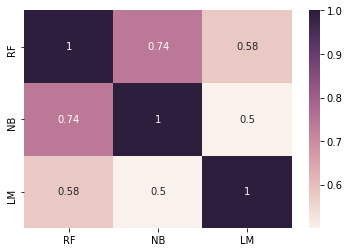

In [546]:
for train_ind, test_ind in kf.split(X, y):
    
    X_train = X[train_ind,:]
    X_test =X[test_ind,:]
    y_train = y[train_ind]
    y_test = y[test_ind]
    
    lm=LogisticRegression()
    lm.fit(X_train, y_train)
    pred=lm.predict(X_test)
    stacked_train.loc[test_ind,'LM']=pred
    
    nb=BayesianRidge()
    nb.fit(X_train,y_train)
    pred=nb.predict(X_test)
    stacked_train.loc[test_ind, 'NB']=pred
    
    
   
    
    
    forest = RandomForestRegressor()
    forest.fit(X_train,y_train)
    pred = forest.predict(X_test)
    stacked_train.loc[test_ind, 'RF']=pred
sns.heatmap(stacked_train.corr(), annot=True)


In [547]:


stacked_model = GradientBoostingRegressor()

params = {
    'loss':['ls','lad','huber','quantile'],
    'n_estimators': [100,150,200,250,300,350],
    'max_depth':[3,5,10,15]
    
}

gs_f = GridSearchCV(stacked_model,param_grid=params, cv=2, scoring='r2')
gs_f.fit(stacked_train, y)
print gs_f.best_score_
print gs_f.best_params_


0.0889703548709
{'n_estimators': 200, 'loss': 'lad', 'max_depth': 3}


In [497]:
cross_val_score(stacked_model, X, y)

array([ 0.16116995,  0.00845778,  0.02364258])

In [498]:
stacked_train

RF           NB      LM
0      26.233446    35.079049     2.0
1       6.461184   150.940245     1.0
2       6.461184   150.940245     1.0
3       1.182197    57.736476     1.0
4       1.182197    57.736476     1.0
5       1.182197    57.736476     1.0
6       5.253138   277.898896     3.0
7       6.461184   150.940245     1.0
8      29.721249    26.589426     2.0
9       6.461184   150.940245     1.0
10    958.348945   969.237616    70.0
11     29.721249    26.589426     2.0
12   1110.996291  1754.365459    10.0
13     26.233446    35.079049     2.0
14      1.182197    57.736476     1.0
15   1347.923414  2595.152880    41.0
16     22.274266    99.228250     6.0
17   1347.923414  2595.152880    41.0
18      1.182197    57.736476     1.0
19     29.721249    26.589426     2.0
20     22.274266    99.228250     6.0
21     29.721249    26.589426     2.0
22     29.721249    26.589426     2.0
23     29.721249    26.589426     2.0
24      6.461184   150.940245     1.0
25      6.461184   150.940245     1.0
26      1.182197    57.736476     1.0
27      1.182197    57.736476     1.0
28      6.461184   150.940245     1.0
29      1.182197    57.736476     1.0
30      1.182197    57.736476     1.0
31     29.721249    26.589426     2.0
32      1.182197    57.736476     1.0
33     29.721249    26.589426     2.0
34     29.721249    26.589426     2.0
35   1347.923414  2595.152880    41.0
36      1.182197    57.736476     1.0
37      1.182197    57.736476     1.0
38      1.182197    57.736476     1.0
39     22.274266    99.228250     6.0
40      1.182197    57.736476     1.0
41      1.182197    57.736476     1.0
42      1.182197    57.736476     1.0
43      1.182197    57.736476     1.0
44   1347.923414  2595.152880    41.0
45      1.182197    57.736476     1.0
46     29.721249    26.589426     2.0
47      6.461184   150.940245     1.0
48   1347.923414  2595.152880    41.0
49      1.283333   242.504306     2.0
50   1347.923414  2595.152880    41.0
51   1347.923414  2595.152880    41.0
52   1347.923414  2595.152880    41.0
53   1347.923414  2595.152880    41.0
54     26.233446    35.079049     2.0
55    958.348945   969.237616    70.0
56     22.274266    99.228250     6.0
57    958.348945   969.237616    70.0
58     26.233446    35.079049     2.0
59     29.721249    26.589426     2.0
60     29.721249    26.589426     2.0
61      1.431212   203.844825     1.0
62     22.274266    99.228250     6.0
63      1.182197    57.736476     1.0
64      1.182197    57.736476     1.0
65      1.182197    57.736476     1.0
66     26.233446    35.079049     2.0
67   1347.923414  2595.152880    41.0
68     29.721249    26.589426     2.0
69     26.233446    35.079049     2.0
70     29.721249    26.589426     2.0
71     26.233446    35.079049     2.0
72     26.233446    35.079049     2.0
73      0.000000   105.323932     0.0
74     22.274266    99.228250     6.0
75     26.233446    35.079049     2.0
76     29.721249    26.589426     2.0
77      6.461184   150.940245     1.0
78      1.182197    57.736476     1.0
79      6.461184   150.940245     1.0
80      1.182197    57.736476     1.0
81     29.721249    26.589426     2.0
82     22.274266    99.228250     6.0
83     22.274266    99.228250     6.0
84      2.188788   134.682439     1.0
85   1110.996291  1754.365459    10.0
86      1.182197    57.736476     1.0
87     22.274266    99.228250     6.0
88     10.257619  1396.595082    31.0
89     10.257619   497.773169    31.0
90     10.257619  1563.176134    31.0
91      1.182197    57.736476     1.0
92     29.721249    26.589426     2.0
93      6.461184   150.940245     1.0
94      6.461184   150.940245     1.0
95     22.274266    99.228250     6.0
96   1347.923414  2595.152880    41.0
97      5.253138   277.898896     3.0
98      1.182197    57.736476     1.0
99      6.461184   150.940245     1.0
100    29.721249    26.589426     2.0
101  1110.996291  1754.365459    10.0
102    22.274266    99.228250     6.0
103     1.182197    57.736476     1.0
104     1.182197    57.7

In [499]:
df_world.shape

(687, 18)

In [500]:
df_world['Outbreak'].value_counts()

Measles           355
Whooping Cough    167
Mumps             101
Announcement       36
Diphtheria         13
Rubella            12
Meningitis          3
Name: Outbreak, dtype: int64